# โหลด packages

In [2]:
source("../R/oaeTS.R", encoding = "UTF-8")
year_now = 2563

In [4]:
price = readRDS('../data/rice/rice_price_list.rds')

# price = readRDS('../data/rice/rice_price_filled.rds')
# colnames(price) = str_replace(colnames(price), "_0", "")
# price_xts = price %>% as.xts()
# colnames(price)

In [4]:
# head(price)

In [3]:
# rh   = price[, c('RHFG', 'RHWS', 'RHXB')] %>% log() %>% na.omit()
# rw   = price[, c('RWFG', 'RWWS', 'RWXB')] %>% log() %>% na.omit()
# rg   = price[, c('RGFG', 'RGWS', 'RGXB')] %>% log() %>% na.omit()

# rhfg = price[, c('RHFG_NR', 'RHFG_BR', 'RHFG_SI', 'RHFG_SU', 'RHFG_UR')] %>% log() %>% na.omit()
# rwfg = price[, c('RWFG_NS', 'RWFG_KP', 'RWFG_PC', 'RWFG_PS', 'RWFG_SH')] %>% log() %>% na.omit()
# rgfg = price[, c('RGFG_UN', 'RGFG_SN', 'RGFG_KK', 'RGFG_MS', 'RGFG_KL')] %>% log() %>% na.omit()

# rfg  = price[, c('RHFG', 'RWFG', 'RGFG')] %>% log() %>% na.omit()

In [12]:
# window(price$rh[, 1:3], start = 2004)

In [63]:
x = list()

# vertical
x$rh = list(endo = price$rh[, 1:3] %>% window(start = 2004), 
            exo  = price$rh[, 4:5] %>% window(start = 2004))
x$rw = list(endo = price$rw[, 1:3] %>% window(start = 2004), 
            exo  = price$rw[, 4:5] %>% window(start = 2004))
x$rg = list(endo = price$rg[, 1:3] %>% window(start = 2004), 
            exo  = price$rg[, 4:5] %>% window(start = 2004))

# spatial
x$rhfg = list(endo = price$rhfg[, 1:5], exo = price$rhfg[, 6:7])
x$rwfg = list(endo = price$rwfg[, 1:5], exo = price$rwfg[, 6:7])
x$rgfg = list(endo = price$rgfg[, 1:5], exo = price$rgfg[, 6:7])

# cross products
x$rfg = list(endo = price$rfg[, 1:3], exo = price$rfg[, 4:5])

**Steps**
1. Model Specification
  - AR Order or Lag Selection
  - Cointegrating Rank
  - Choice of Deterministic Term
  - Testing Restrictions to alphas and betas
  - Testing Restriction for SR params and fitting subset models
2. Model Checking
  - Descriptive Analysis
  - Diagnostic Tests
    * Serial Autocorrelation
    * Heteroskedasticity
    * Normality
  - Stability Analysis
3. Analysis
  - Interpret
  - Test economic theory
  - Forecast
  - Granger Causality
  - IRF
  - FEVD

# Vertical PT: Hommali Rice

In [269]:
endo = x$rh$endo
exo = x$rh$exo

In [270]:
summary(endo %>% exp())

      RHFG            RHWS            RHXB      
 Min.   : 7186   Min.   :13795   Min.   :14622  
 1st Qu.: 9196   1st Qu.:20130   1st Qu.:22367  
 Median :13103   Median :28646   Median :31870  
 Mean   :12234   Mean   :26126   Mean   :28767  
 3rd Qu.:14622   3rd Qu.:31063   3rd Qu.:34508  
 Max.   :17292   Max.   :36069   Max.   :38815  

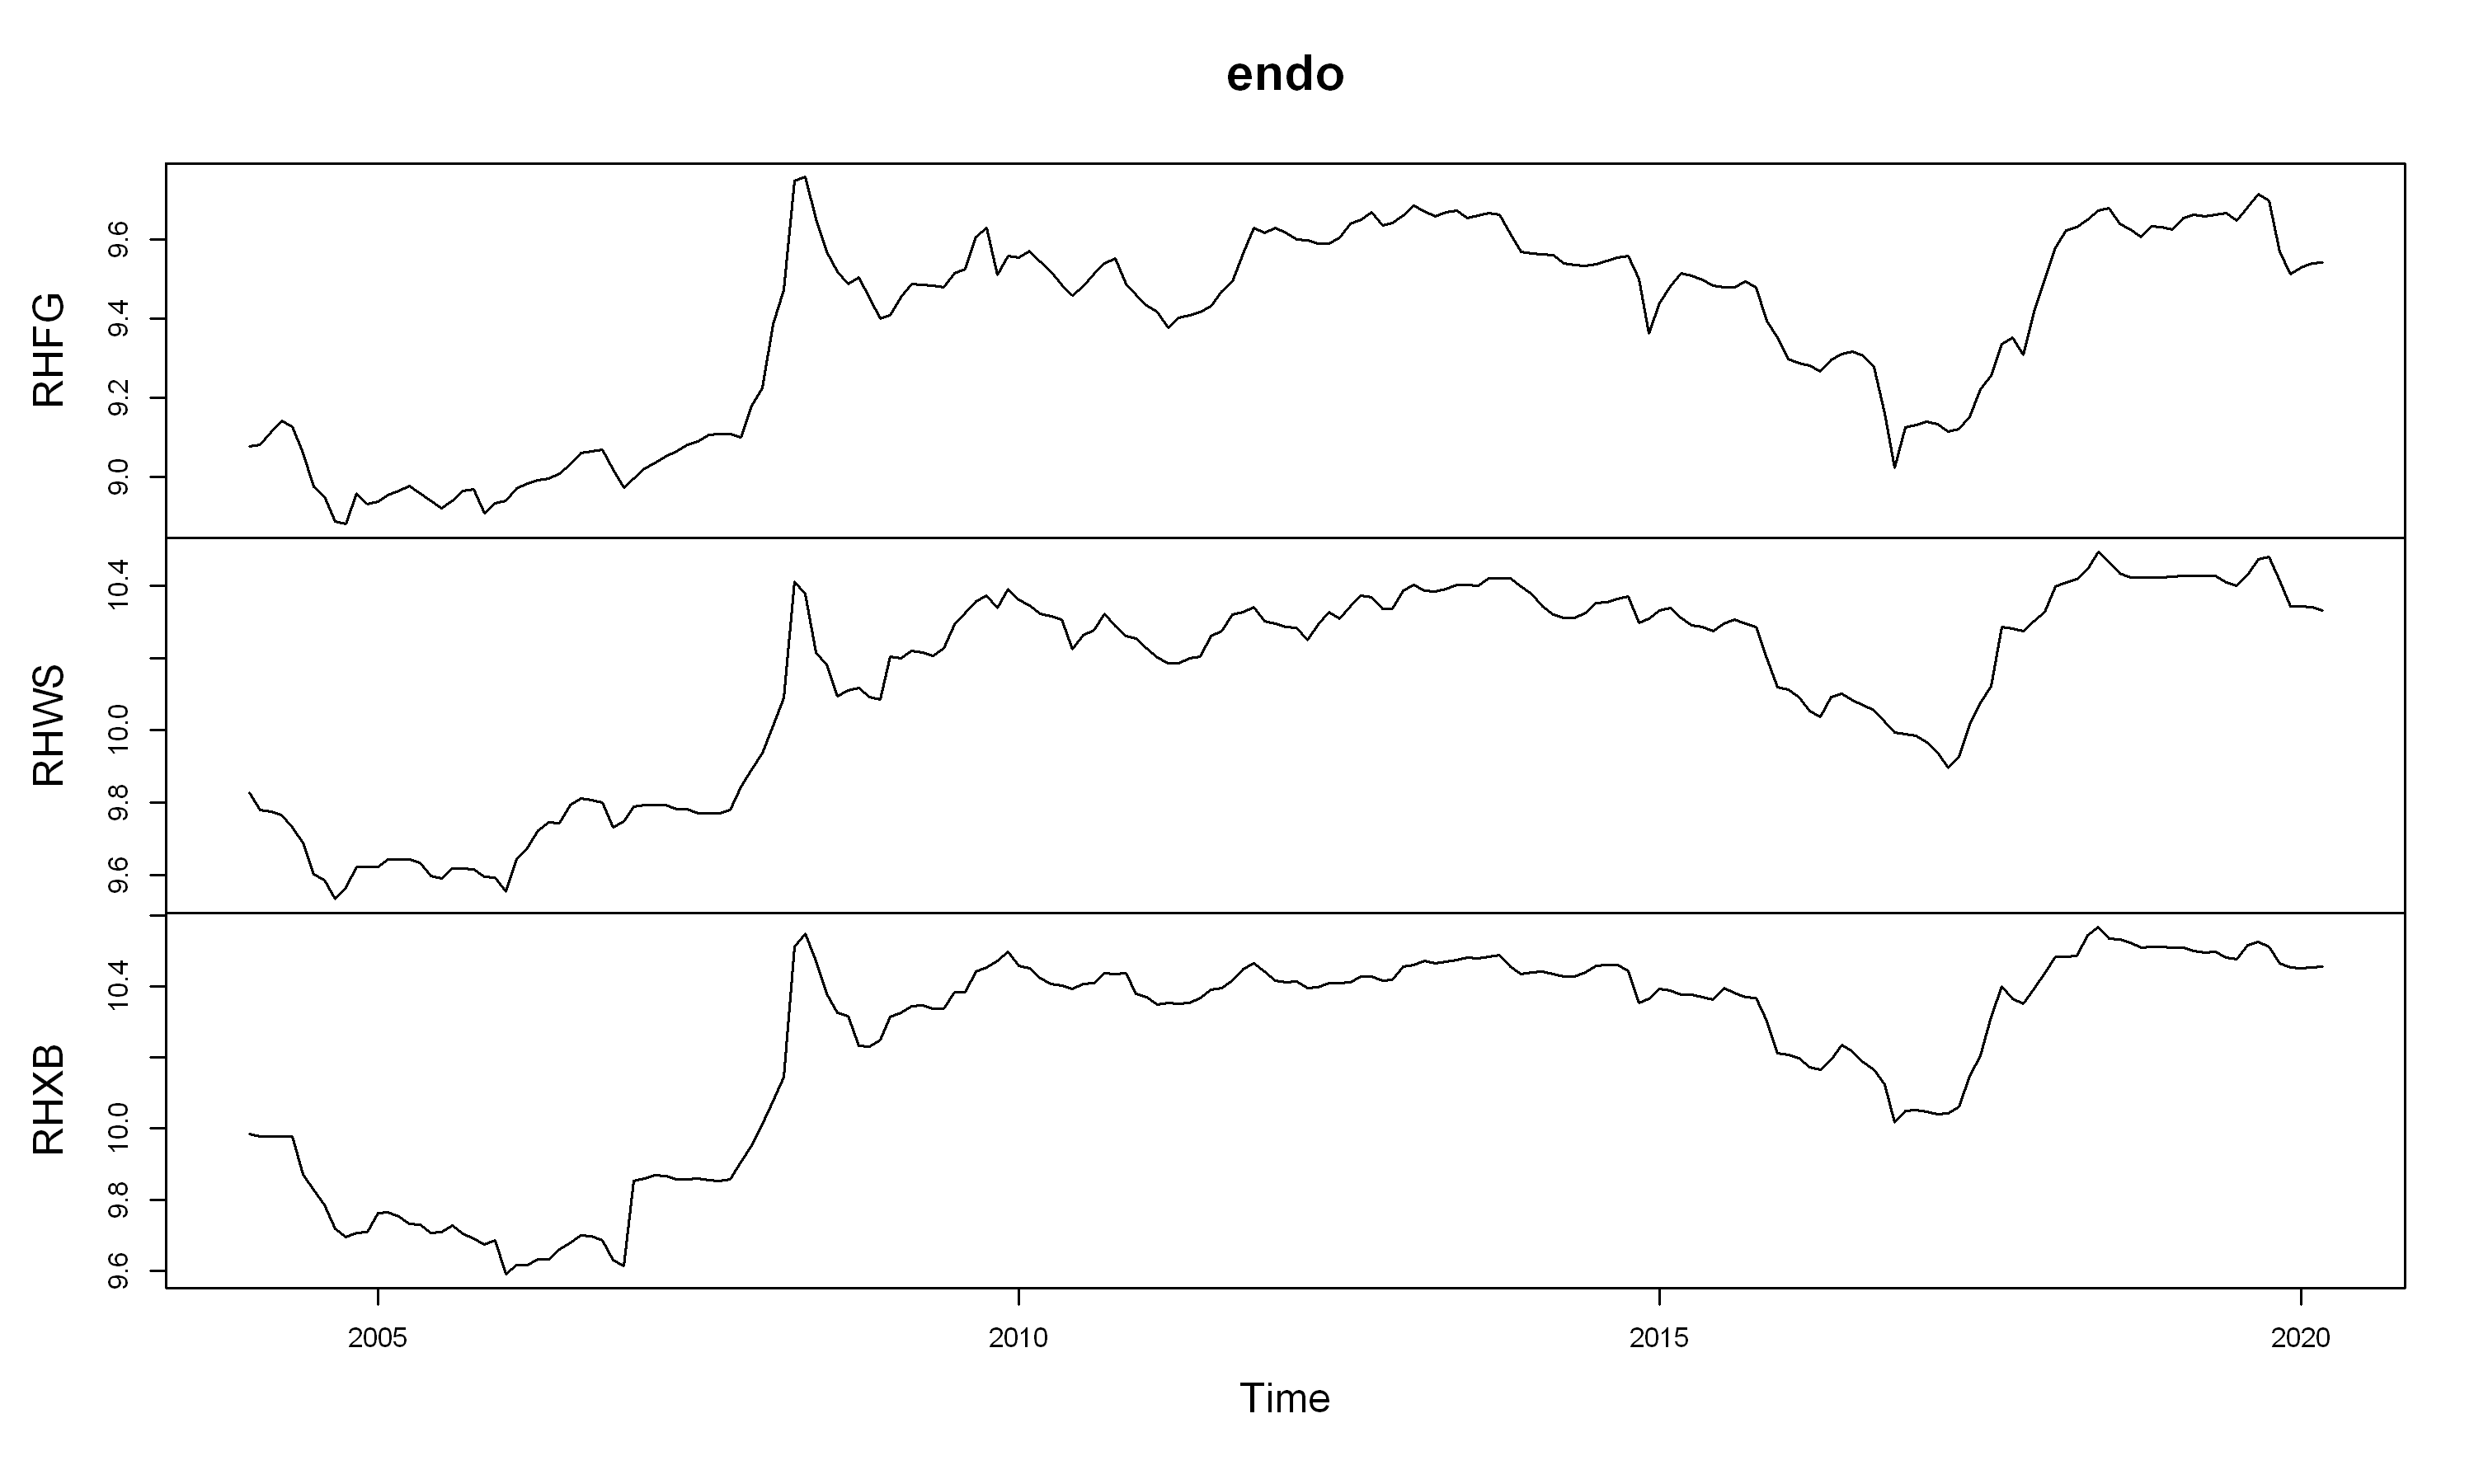

In [271]:
set_figsize(10, 6)
plot.ts(endo)

In [295]:
ur.df(endo[, 1], 'trend', lags = 12, selectlags = 'AIC') %>% summary()


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -2.3259 2.1094 2.9264 


In [287]:
ur.df(endo[, 1], 'trend', lags = 12, selectlags = 'AIC')
ur.df(endo[, 2], 'trend', lags = 12, selectlags = 'AIC')
ur.df(endo[, 3], 'trend', lags = 12, selectlags = 'AIC')
ur.df(endo[, 1], 'trend', lags = 12, selectlags = 'AIC')@cval


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -2.3259 2.1094 2.9264 



############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -2.1509 2.0842 2.7019 



############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -1.9205 1.585 2.024 


,1pct,5pct,10pct
tau3,-3.99,-3.43,-3.13
phi2,6.22,4.75,4.07
phi3,8.43,6.49,5.47


In [288]:
ur.df(endo[, 1], 'drift', lags = 12, selectlags = 'AIC')
ur.df(endo[, 2], 'drift', lags = 12, selectlags = 'AIC')
ur.df(endo[, 3], 'drift', lags = 12, selectlags = 'AIC')
ur.df(endo[, 1], 'drift', lags = 12, selectlags = 'AIC')@cval


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -2.3211 2.9323 



############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -2.1859 2.8143 



############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -1.8485 2.0626 


,1pct,5pct,10pct
tau2,-3.46,-2.88,-2.57
phi1,6.52,4.63,3.81


In [291]:
ur.df(endo[, 1], 'none', lags = 12, selectlags = 'AIC')
ur.df(endo[, 2], 'none', lags = 12, selectlags = 'AIC')
ur.df(endo[, 3], 'none', lags = 12, selectlags = 'AIC')
ur.df(endo[, 1], 'none', lags = 12, selectlags = 'AIC')@cval


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: 0.6233 



############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: 0.8571 



############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: 0.7853 


,1pct,5pct,10pct
tau1,-2.58,-1.95,-1.62


## Model Selection

In [292]:
VARselect(endo, lag.max = 4, type = 'none', exogen = exo)

,1,2,3,4
AIC(n),-2.056483e+01,-2.056472e+01,-2.054474e+01,-2.049189e+01
HQ(n),-2.046138e+01,-2.039919e+01,-2.031714e+01,-2.020222e+01
SC(n),-2.030942e+01,-2.015605e+01,-1.998283e+01,-1.977673e+01
FPE(n),1.171718e-09,1.171982e-09,1.195913e-09,1.261331e-09


In [293]:
VARselect(endo, lag.max = 4, type = 'const', exogen = exo)

,1,2,3,4
AIC(n),-2.057123e+01,-2.057873e+01,-2.055447e+01,-2.049937e+01
HQ(n),-2.044709e+01,-2.039251e+01,-2.030618e+01,-2.018900e+01
SC(n),-2.026473e+01,-2.011898e+01,-1.994147e+01,-1.973312e+01
FPE(n),1.164273e-09,1.155746e-09,1.184471e-09,1.252162e-09


In [280]:
VARselect(endo, lag.max = 4, type = 'both', exogen = exo)

,1,2,3,4
AIC(n),-2.057396e+01,-2.057971e+01,-2.055727e+01,-2.050276e+01
HQ(n),-2.042912e+01,-2.037280e+01,-2.028829e+01,-2.017171e+01
SC(n),-2.021638e+01,-2.006888e+01,-1.989319e+01,-1.968544e+01
FPE(n),1.161147e-09,1.154707e-09,1.181315e-09,1.248174e-09


In [26]:
vecm_rh.trace = ca.jo(
  x$rh$endo, type = 'trace', ecdet = 'trend', K = 2, 
  spec = 'transitory', dumvar = x$rh$exo
)

vecm_rh.eigen = ca.jo(
  x$rh$endo, type = 'eigen', ecdet = 'trend', K = 2, 
  spec = 'transitory', dumvar = x$rh$exo
)

summary(vecm_rh.trace)
summary(vecm_rh.eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.542492e-01 1.004410e-01 2.819493e-02 2.321737e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  5.86 10.49 12.25 16.26
r <= 1 | 27.56 22.76 25.32 30.45
r = 0  | 61.91 39.06 42.44 48.45

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               RHFG.l1       RHWS.l1      RHXB.l1    trend.l1
RHFG.l1   1.0000000000  1.0000000000  1.000000000  1.00000000
RHWS.l1  -1.2470163139  1.4777436724 -1.301016759  0.69977887
RHXB.l1   0.2999195289 -2.0843346900 -1.285675991 -1.37528412
trend.l1  0.0004406211 -0.0005475334  0.006005925 -0.01445594

Weights W:
(This is the loading matrix)

           RHFG.l1     RHWS.l1    RHXB.l1      trend.l1
RHFG.d -0.16218295 -0.06286233 0.01262062  2.070520e-15
RHWS.d -0.01242251 -0.02846757 0.02306221 -9.46


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.542492e-01 1.004410e-01 2.819493e-02 2.321737e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  5.86 10.49 12.25 16.26
r <= 1 | 21.70 16.85 18.96 23.65
r = 0  | 34.34 23.11 25.54 30.34

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               RHFG.l1       RHWS.l1      RHXB.l1    trend.l1
RHFG.l1   1.0000000000  1.0000000000  1.000000000  1.00000000
RHWS.l1  -1.2470163139  1.4777436724 -1.301016759  0.69977887
RHXB.l1   0.2999195289 -2.0843346900 -1.285675991 -1.37528412
trend.l1  0.0004406211 -0.0005475334  0.006005925 -0.01445594

Weights W:
(This is the loading matrix)

           RHFG.l1     RHWS.l1    RHXB.l1      trend.l1
RHFG.d -0.16218295 -0.06286233 0.01262062  2.070520e-15
RHWS.d -0.01242251 -0

r = 2

In [27]:
vecm_rh = cajorls(vecm_rh.trace, r = 2)

In [28]:
args(VAR)

function (y, p = 1, type = c("const", "trend", "both", "none"), 
    season = NULL, exogen = NULL, lag.max = NULL, ic = c("AIC", 
        "HQ", "SC", "FPE")) 
NULL

In [29]:
var1 = VAR(x$rh$endo , p = 1 , type = 'both', exogen = x$rh$exo)
var2 = VAR(x$rh$endo , p = 2 , type = 'both', exogen = x$rh$exo)

In [33]:
serial.test(var2, lags.pt = 12, type = 'PT.asymptotic')


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var2
Chi-squared = 103.07, df = 90, p-value = 0.1636

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var2
Chi-squared = 103.07, df = 90, p-value = 0.1636



In [41]:
arch.test(var2, lags.multi = 12)


	ARCH (multivariate)

data:  Residuals of VAR object var2
Chi-squared = 470.8, df = 432, p-value = 0.09595

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object var2
Chi-squared = 470.8, df = 432, p-value = 0.09595



In [42]:
normality.test(var2)

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var2
Chi-squared = 1214.7, df = 6, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var2
Chi-squared = 146.03, df = 3, p-value < 2.2e-16


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var2
Chi-squared = 1068.7, df = 3, p-value < 2.2e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var2
Chi-squared = 1214.7, df = 6, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var2
Chi-squared = 146.03, df = 3, p-value < 2.2e-16


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var2
Chi-squared = 1068.7, df = 3, p-value < 2.2e-16




In [47]:
var_rh = vec2var(vecm_rh.trace)
serial.test(var_rh, lags.pt = 12, type = 'PT.asymptotic')
arch.test(var_rh, lags.multi = 12)
normality.test(var_rh)


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_rh
Chi-squared = 108.28, df = 93, p-value = 0.1329

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_rh
Chi-squared = 108.28, df = 93, p-value = 0.1329




	ARCH (multivariate)

data:  Residuals of VAR object var_rh
Chi-squared = 437.6, df = 432, p-value = 0.4159

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object var_rh
Chi-squared = 437.6, df = 432, p-value = 0.4159



$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var_rh
Chi-squared = 1875.6, df = 6, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var_rh
Chi-squared = 172.68, df = 3, p-value < 2.2e-16


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var_rh
Chi-squared = 1702.9, df = 3, p-value < 2.2e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var_rh
Chi-squared = 1875.6, df = 6, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var_rh
Chi-squared = 172.68, df = 3, p-value < 2.2e-16


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var_rh
Chi-squared = 1702.9, df = 3, p-value < 2.2e-16




## Test Law of One Price

In [122]:
head(x$rh$endo)

,RHFG,RHWS,RHXB
Jan 2003,8.651724,9.224066,9.949133
Feb 2003,8.687105,9.574791,9.658170
Mar 2003,8.820404,9.731145,9.694224
Apr 2003,8.922925,9.810839,9.876124
May 2003,8.936956,9.816734,9.920075
Jun 2003,8.976641,9.831723,9.923314


In [207]:
data(Canada)
var.2c <- VAR(Canada, p = 2, type = "const")
causality(var.2c, cause = "e")

$Granger

	Granger causality H0: e do not Granger-cause prod rw U

data:  VAR object var.2c
F-Test = 6.2768, df1 = 6, df2 = 292, p-value = 3.206e-06


$Instant

	H0: No instantaneous causality between: e and prod rw U

data:  VAR object var.2c
Chi-squared = 26.068, df = 3, p-value = 9.228e-06



In [165]:
H1 = ca.jo(
  x$rh$endo, type = 'trace', ecdet = 'none', K = 2, 
  spec = 'transitory', dumvar = x$rh$exo
)
H1 %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.14669614 0.09824063 0.01223950

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  2.52  6.50  8.18 11.65
r <= 1 | 23.72 15.66 17.95 23.52
r = 0  | 56.24 28.71 31.52 37.22

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           RHFG.l1   RHWS.l1    RHXB.l1
RHFG.l1  1.0000000  1.000000  1.0000000
RHWS.l1 -1.0834382  1.655961 -0.8947993
RHXB.l1  0.2242216 -2.353852 -1.0845027

Weights W:
(This is the loading matrix)

           RHFG.l1     RHWS.l1     RHXB.l1
RHFG.d -0.17820008 -0.04784605 0.007952441
RHWS.d -0.03665092 -0.01803932 0.015122800
RHXB.d -0.14309234  0.03688063 0.010854371


In [166]:
H3 = matrix(c(1, -1, -1), nrow = 3, ncol = 1)

# H5 = matrix(c(1, -1, -1))
# Hlop = matrix(c(1, -1, -1), nrow = 3, ncol = 1)

bh5lrtest(z = H1, H = H3, r = 2) %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Estimation and testing under partly known beta 

The VECM has been estimated subject to: 
beta=H*phi and/or alpha=A*psi

     [,1]
[1,]    1
[2,]   -1
[3,]   -1

Eigenvalues of restricted VAR (lambda):
[1] 0.1467 0.0982

The value of the likelihood ratio test statistic:
18.67 distributed as chi square with 1 df.
The p-value of the test statistic is: 0 

Eigenvectors, normalised to first column
of the restricted VAR:

     [,1]    [,2]
[1,]    1  1.0000
[2,]   -1 -1.2189
[3,]   -1  2.2189

Weights W of the restricted VAR:

          [,1]    [,2]
RHFG.d -0.1023 -0.0679
RHWS.d -0.0079 -0.0141
RHXB.d -0.0784 -0.0545


In [120]:
mat_lop = matrix(c(1, -1, 0, 0), 
                 nrow = 4, ncol = 1)

blrtest(z = vecm_rh.trace, H = mat_lop, r = 2)


##################################################### 
# Johansen-Procedure Unit Root / Cointegration Test # 
##################################################### 

The value of the test statistic is: NA 


In [215]:
options(
  repr.plot.width=10, 
  repr.plot.height=10, 
  repr.plot.res = 300
)

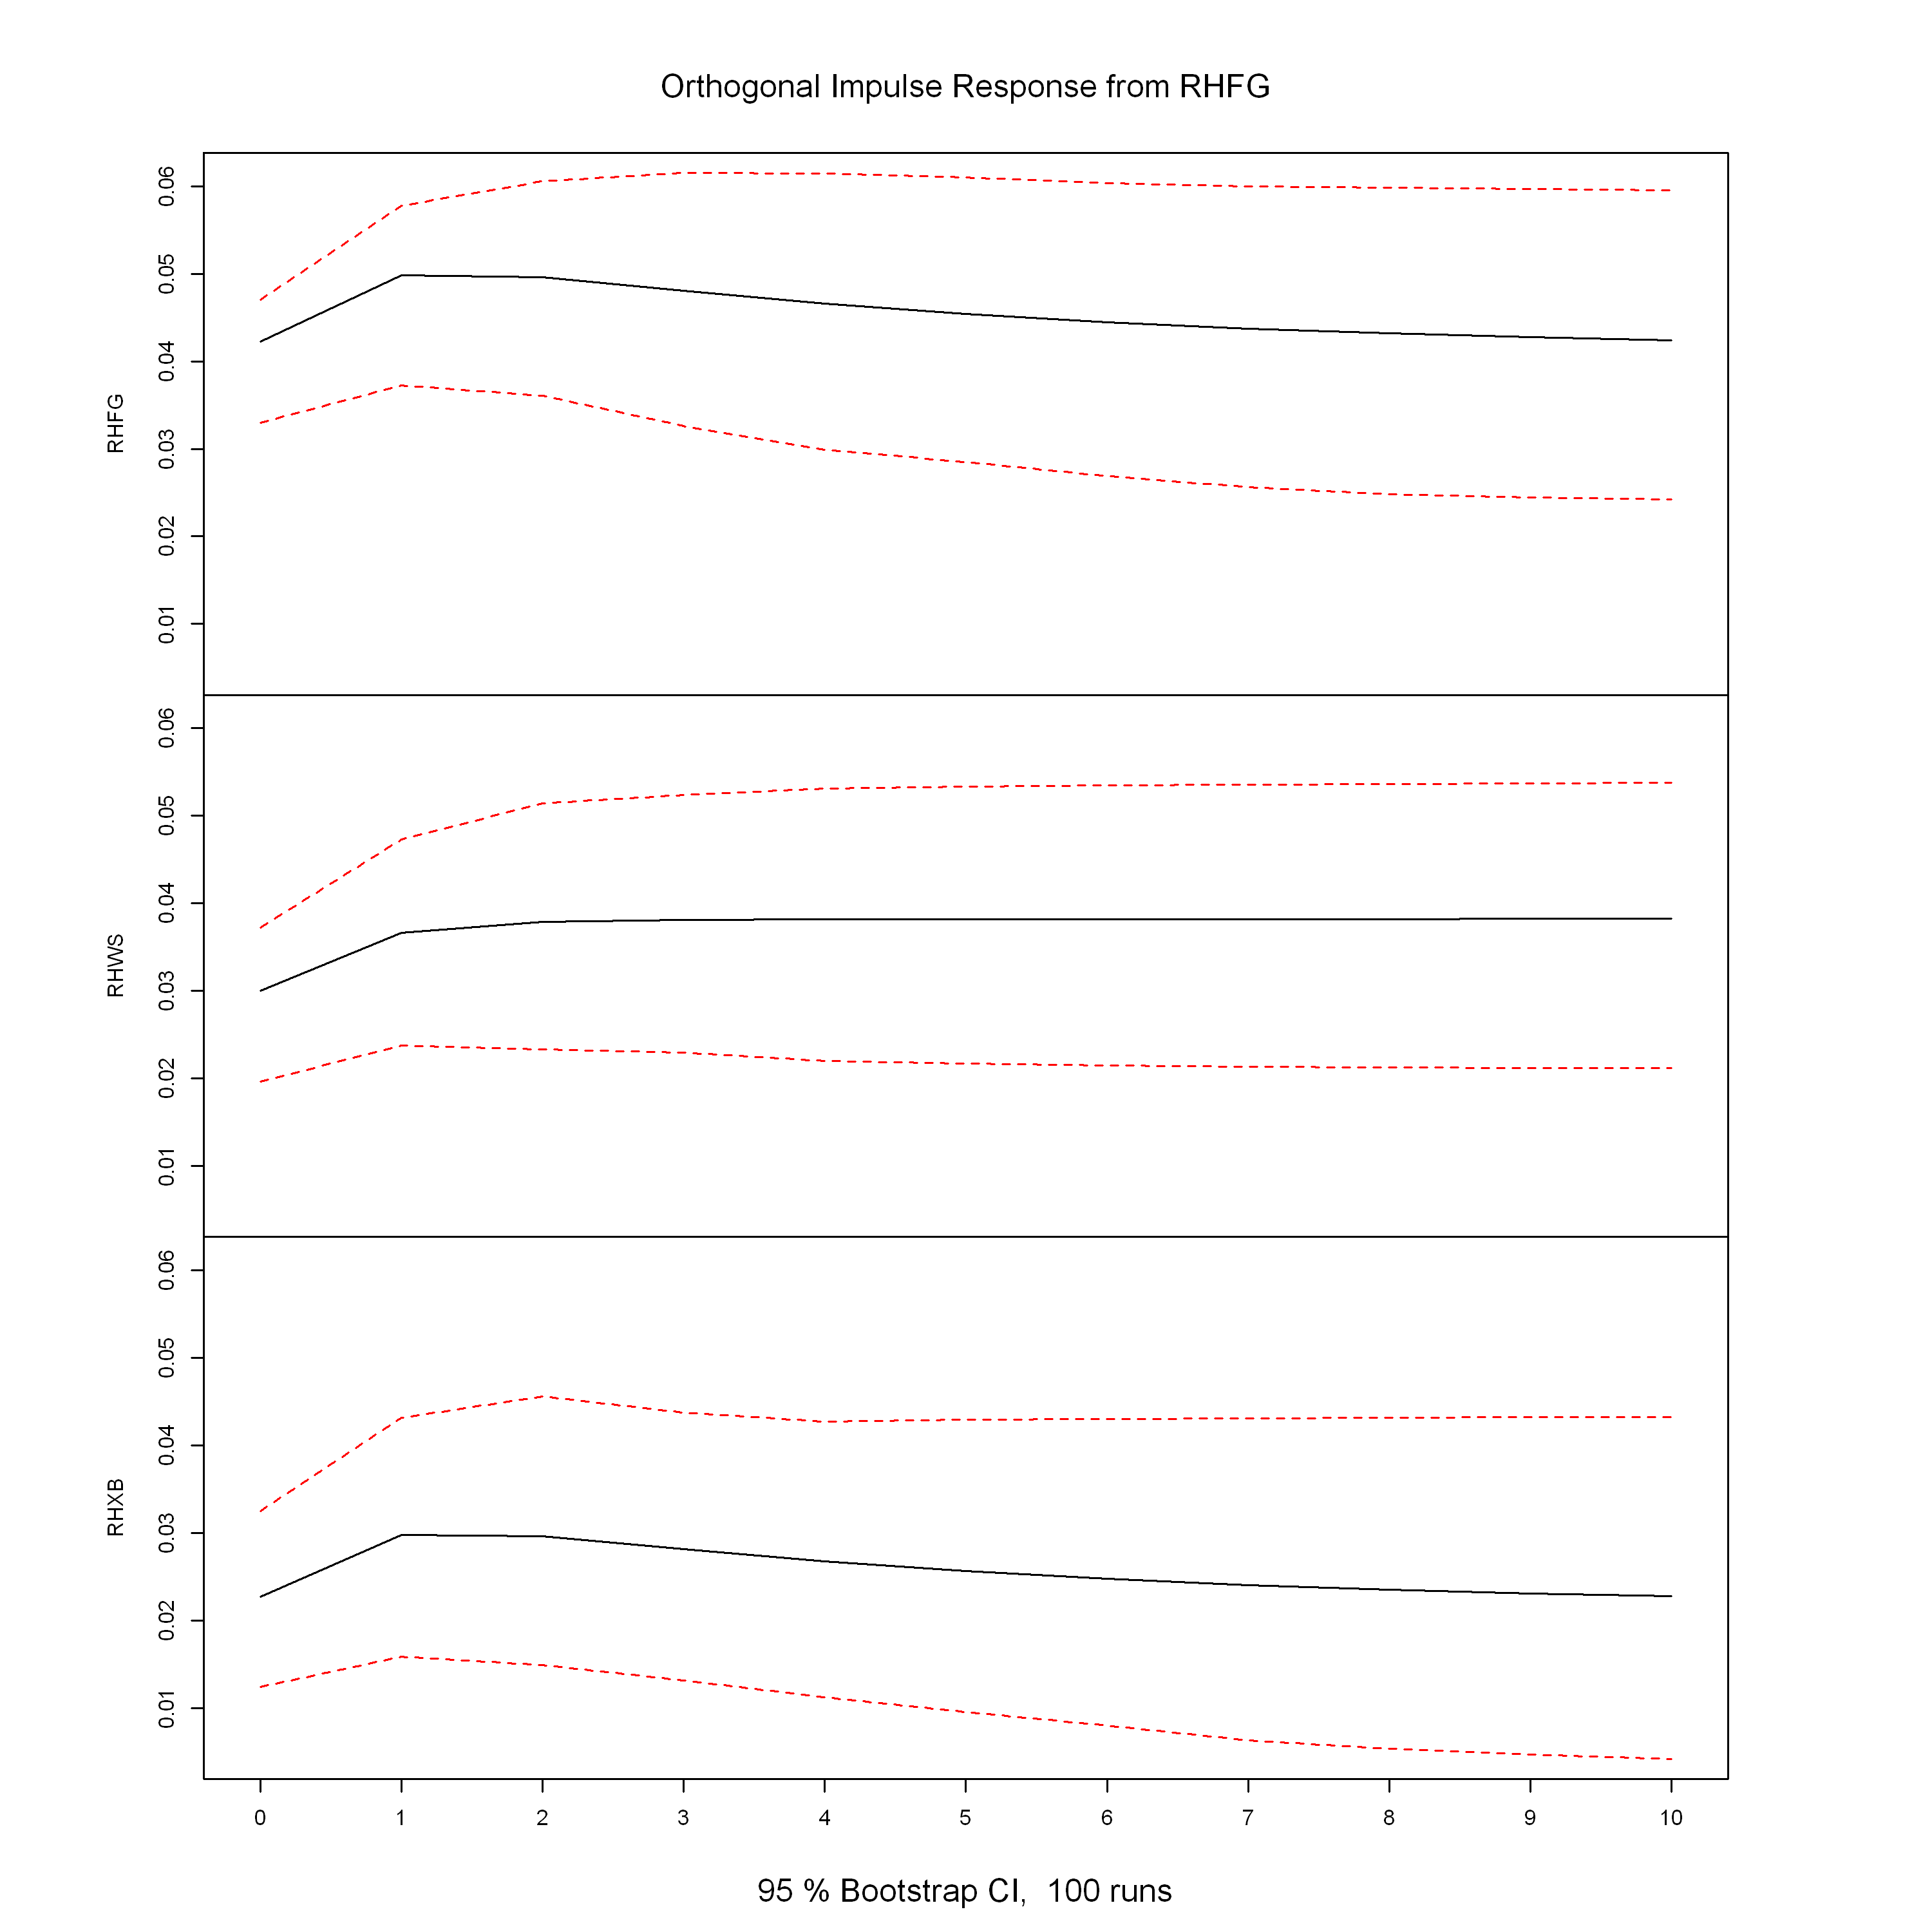

In [217]:
plot(irf(var_rh, impulse = "RHFG")) 

# Horizontal : Hommali Rice

In [265]:
H1 = ca.jo(
  x$rwfg$endo[, c(1,2,3,4,5)], type = 'trace', ecdet = 'none', K = 2, 
  spec = 'transitory', dumvar = x$rwfg$exo
)
H1 %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.29584352 0.21831761 0.17706196 0.16567962 0.07349356

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 4 |  12.06  6.50  8.18 11.65
r <= 3 |  40.68 15.66 17.95 23.52
r <= 2 |  71.47 28.71 31.52 37.22
r <= 1 | 110.39 45.23 48.28 55.43
r = 0  | 165.81 66.49 70.60 78.87

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           RWFG_NS.l1  RWFG_KP.l1 RWFG_PC.l1 RWFG_PS.l1  RWFG_SH.l1
RWFG_NS.l1    1.00000  1.00000000  1.0000000  1.0000000  1.00000000
RWFG_KP.l1 -107.09828  1.20668944 -9.8531758 -0.7521919 -0.87174549
RWFG_PC.l1  167.82507 -1.61763154  3.8376188 -0.2757950  0.03267208
RWFG_PS.l1  -49.38471 -0.62668585  0.5189105  0.1690120 -0.05557786
RWFG_SH.l1  -18.61808 -0.01771374  4.5922087 -0.1999773  0.23117080

Weights W:
(This is the loading matrix)

   

In [268]:
HA = matrix(c( 1, 1, 1, 1,
              -1, 0, 0, 0,
               0,-1, 0, 0,
               0, 0,-1, 0,
               0, 0, 0,-1
             ), 
            ncol = 4, byrow = TRUE)

blrtest(z = H1, H = HA, r = 4) %>% summary()

# H5 = matrix(c( 1, -1), 
#             ncol = 1, byrow = TRUE)

# H5 = c(1, -1)
# Hlop = matrix(c(1, -1, -1), nrow = 3, ncol = 1)

# bh5lrtest(z = H1, H = H5, r = 1) %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Estimation and testing under linear restrictions on beta 

The VECM has been estimated subject to: 
beta=H*phi and/or alpha=A*psi

     [,1] [,2] [,3] [,4]
[1,]    1    1    1    1
[2,]   -1    0    0    0
[3,]    0   -1    0    0
[4,]    0    0   -1    0
[5,]    0    0    0   -1

Eigenvalues of restricted VAR (lambda):
[1] 0.2813 0.2108 0.1768 0.1489

The value of the likelihood ratio test statistic:
7.93 distributed as chi square with 4 df.
The p-value of the test statistic is: 0.09 

Eigenvectors, normalised to first column
of the restricted VAR:

        [,1]    [,2]    [,3]    [,4]
[1,]  1.0000  1.0000  1.0000  1.0000
[2,]  4.5941  1.5951 -5.6380 -0.5966
[3,] -7.4743 -1.7274  1.9112 -0.2836
[4,]  1.5441 -1.0059  0.4390  0.0421
[5,]  0.3360  0.1382  2.2878 -0.1619

Weights W of the restricted VAR:

             [,1]    [,2]    [,3]    [,4]
RWFG_NS.d  0.0165 -0.0465  0.0768 -0.1424
RWFG_KP.d -0.0006  0.0150  0

In [109]:
data(denmark)
sjd <- denmark[, c("LRM", "LRY", "IBO", "IDE")]
sjd.vecm <- ca.jo(sjd, ecdet="const", 
                  type="trace", K=2, 
                  spec="transitory", season=4)
HD0 <- matrix(c(1, -1, -1, -1, -1), c(5,1))
blrtest(sjd.vecm, H=HD0, r=1)
# summary(blrtest(sjd.vecm, H=HD0, r=1))


##################################################### 
# Johansen-Procedure Unit Root / Cointegration Test # 
##################################################### 

The value of the test statistic is: 26.6114 



##################################################### 
# Johansen-Procedure Unit Root / Cointegration Test # 
##################################################### 

The value of the test statistic is: NA 


In [19]:
rh.cajolst = cajolst(x$rh$endo, trend = TRUE)
slotNames(rh.cajolst)
summary(rh.cajolst)

[1] "x"         "Z0"        "Z1"        "ZK"        "type"      "model"    
 [7] "ecdet"     "lag"       "P"         "season"    "dumvar"    "cval"     
[13] "teststat"  "lambda"    "Vorg"      "V"         "W"         "PI"       
[19] "DELTA"     "GAMMA"     "R0"        "RK"        "bp"        "spec"     
[25] "call"      "test.name"


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in shift correction 

Eigenvalues (lambda):
[1] 0.13764255 0.08206137 0.06259801

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 | 12.45  5.42  6.78 10.04
r <= 1 | 28.61 13.78 15.83 19.85
r = 0  | 55.05 25.93 28.45 33.76

Eigenvectors, normalised to first column:
(These are the cointegration relations)

          RHFG.l1    RHWS.l1    RHXB.l1
RHFG.l1  1.000000  1.0000000  1.0000000
RHWS.l1 -2.649577 -0.4365055  1.5536408
RHXB.l1  1.889812 -0.7904036 -0.9084063

Weights W:
(This is the loading matrix)

         RHFG.l1     RHWS.l1     RHXB.l1
RHFG -0.08831371 -0.06214098 -0.05331644
RHWS -0.05049949  0.05974171 -0.05302720
RHXB -0.13384118  0.05618523 -0.03371309


In [25]:
index(x$rh$endo)[59]

[1] 2007.833

In [20]:
rh.cajolst@bp

[1] 59

In [17]:
rh.cajolst


##################################################### 
# Johansen-Procedure Unit Root / Cointegration Test # 
##################################################### 

The value of the test statistic is: 12.447 28.6149 55.0513 


In [39]:
args(ca.jo)

function (x, type = c("eigen", "trace"), ecdet = c("none", "const", 
    "trend"), K = 2, spec = c("longrun", "transitory"), season = NULL, 
    dumvar = NULL) 
NULL

In [40]:
ca.jo(rh05, type = 'eigen', ecdet = "trend") %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 9.021311e-02 7.151109e-02 2.356585e-02 3.469447e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.32 10.49 12.25 16.26
r <= 1 | 13.43 16.85 18.96 23.65
r = 0  | 17.11 23.11 25.54 30.34

Eigenvectors, normalised to first column:
(These are the cointegration relations)

              RHFG.l2       RHWS.l2      RHXB.l2    trend.l2
RHFG.l2   1.000000000  1.0000000000  1.000000000  1.00000000
RHWS.l2  -1.499094547  0.7671283953 -3.057269364 -7.85164140
RHXB.l2   0.378756332 -1.5521663847  6.221629257  1.01275534
trend.l2  0.001055958  0.0005789851 -0.007778904  0.07700187

Weights W:
(This is the loading matrix)

           RHFG.l2     RHWS.l2      RHXB.l2      trend.l2
RHFG.d -0.06322255 -0.05153949 -0.004681880 -1.247201e-15
RHWS.d  0.08340635 -0.

In [38]:
summary(rh.cajolst)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in shift correction 

Eigenvalues (lambda):
[1] 0.09889188 0.08247935 0.04065810

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  7.21  5.42  6.79 10.04
r <= 1 | 21.56 13.78 15.83 19.85
r = 0  | 38.63 25.93 28.45 33.76

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           RHFG.l1   RHWS.l1   RHXB.l1
RHFG.l1  1.0000000  1.000000  1.000000
RHWS.l1 -1.3504012  1.220523 -2.530862
RHXB.l1  0.2994499 -2.168296 -6.102077

Weights W:
(This is the loading matrix)

         RHFG.l1     RHWS.l1     RHXB.l1
RHFG -0.09110301 -0.06580897 0.007557987
RHWS  0.08681969 -0.04005192 0.007857200
RHXB  0.00238193  0.01652108 0.007702644


In [34]:
index(rw)[13]

[1] 2007.917

# VAR

## Model Specification

In [68]:
args(VARselect)

function (y, lag.max = 10, type = c("const", "trend", "both", 
    "none"), season = NULL, exogen = NULL) 
NULL

In [69]:
VARselect(rh05, lag.max = 12, type = "both")

,1,2,3,4,5,6,7,8,9,10,11,12
AIC(n),-2.026950e+01,-2.036678e+01,-2.032030e+01,-2.025795e+01,-2.019299e+01,-2.012172e+01,-2.006726e+01,-2.001591e+01,-1.994732e+01,-1.990709e+01,-1.985734e+01,-1.982285e+01
HQ(n),-2.015768e+01,-2.018787e+01,-2.007430e+01,-1.994486e+01,-1.981280e+01,-1.967444e+01,-1.955289e+01,-1.943444e+01,-1.929876e+01,-1.919144e+01,-1.907460e+01,-1.897302e+01
SC(n),-1.999391e+01,-1.992584e+01,-1.971402e+01,-1.948632e+01,-1.925600e+01,-1.901938e+01,-1.879957e+01,-1.858287e+01,-1.834893e+01,-1.814335e+01,-1.792825e+01,-1.772841e+01
FPE(n),1.574311e-09,1.428594e-09,1.497049e-09,1.594269e-09,1.702766e-09,1.830831e-09,1.936581e-09,2.043141e-09,2.194317e-09,2.292310e-09,2.419400e-09,2.516919e-09


## Modle Estimation

In [70]:
args(VAR)

function (y, p = 1, type = c("const", "trend", "both", "none"), 
    season = NULL, exogen = NULL, lag.max = NULL, ic = c("AIC", 
        "HQ", "SC", "FPE")) 
NULL

In [71]:
rh05.VAR = VAR(rh05, p = 2, type = "both")

In [131]:
rh10.VAR = VAR(rh10, p = 2, type = "both")

In [74]:
summary(rh05.VAR)


VAR Estimation Results:
Endogenous variables: RHFG, RHWS, RHXB 
Deterministic variables: both 
Sample size: 181 
Log Likelihood: 1106.617 
Roots of the characteristic polynomial:
0.9537 0.8302 0.8125 0.3532 0.09225 0.02278
Call:
VAR(y = rh05, p = 2, type = "both")


Estimation results for equation RHFG: 
RHFG = RHFG.l1 + RHWS.l1 + RHXB.l1 + RHFG.l2 + RHWS.l2 + RHXB.l2 + const + trend 

          Estimate Std. Error t value Pr(>|t|)    
RHFG.l1  9.953e-01  1.033e-01   9.635   <2e-16 ***
RHWS.l1  3.072e-01  1.310e-01   2.346   0.0201 *  
RHXB.l1  1.344e-01  1.204e-01   1.116   0.2660    
RHFG.l2 -1.386e-01  1.024e-01  -1.353   0.1779    
RHWS.l2 -2.405e-01  1.308e-01  -1.839   0.0677 .  
RHXB.l2 -8.679e-02  1.183e-01  -0.733   0.4643    
const    1.892e-01  1.731e-01   1.093   0.2760    
trend   -6.520e-05  9.771e-05  -0.667   0.5055    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.04175 on 173 degrees of freedom
Multiple R-Squared: 0.9

## Model Daignostic

In [73]:
roots(rh05.VAR)

[1] 0.95374774 0.83024915 0.81248813 0.35323255 0.09225276 0.02277770

### Autocorrelation

In [75]:
args(serial.test)

function (x, lags.pt = 16, lags.bg = 5, type = c("PT.asymptotic", 
    "PT.adjusted", "BG", "ES")) 
NULL

In [81]:
rh05.VAR.ser = serial.test(rh05.VAR)
rh05.VAR.ser


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object rh05.VAR
Chi-squared = 137.58, df = 126, p-value = 0.2267

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object rh05.VAR
Chi-squared = 137.58, df = 126, p-value = 0.2267



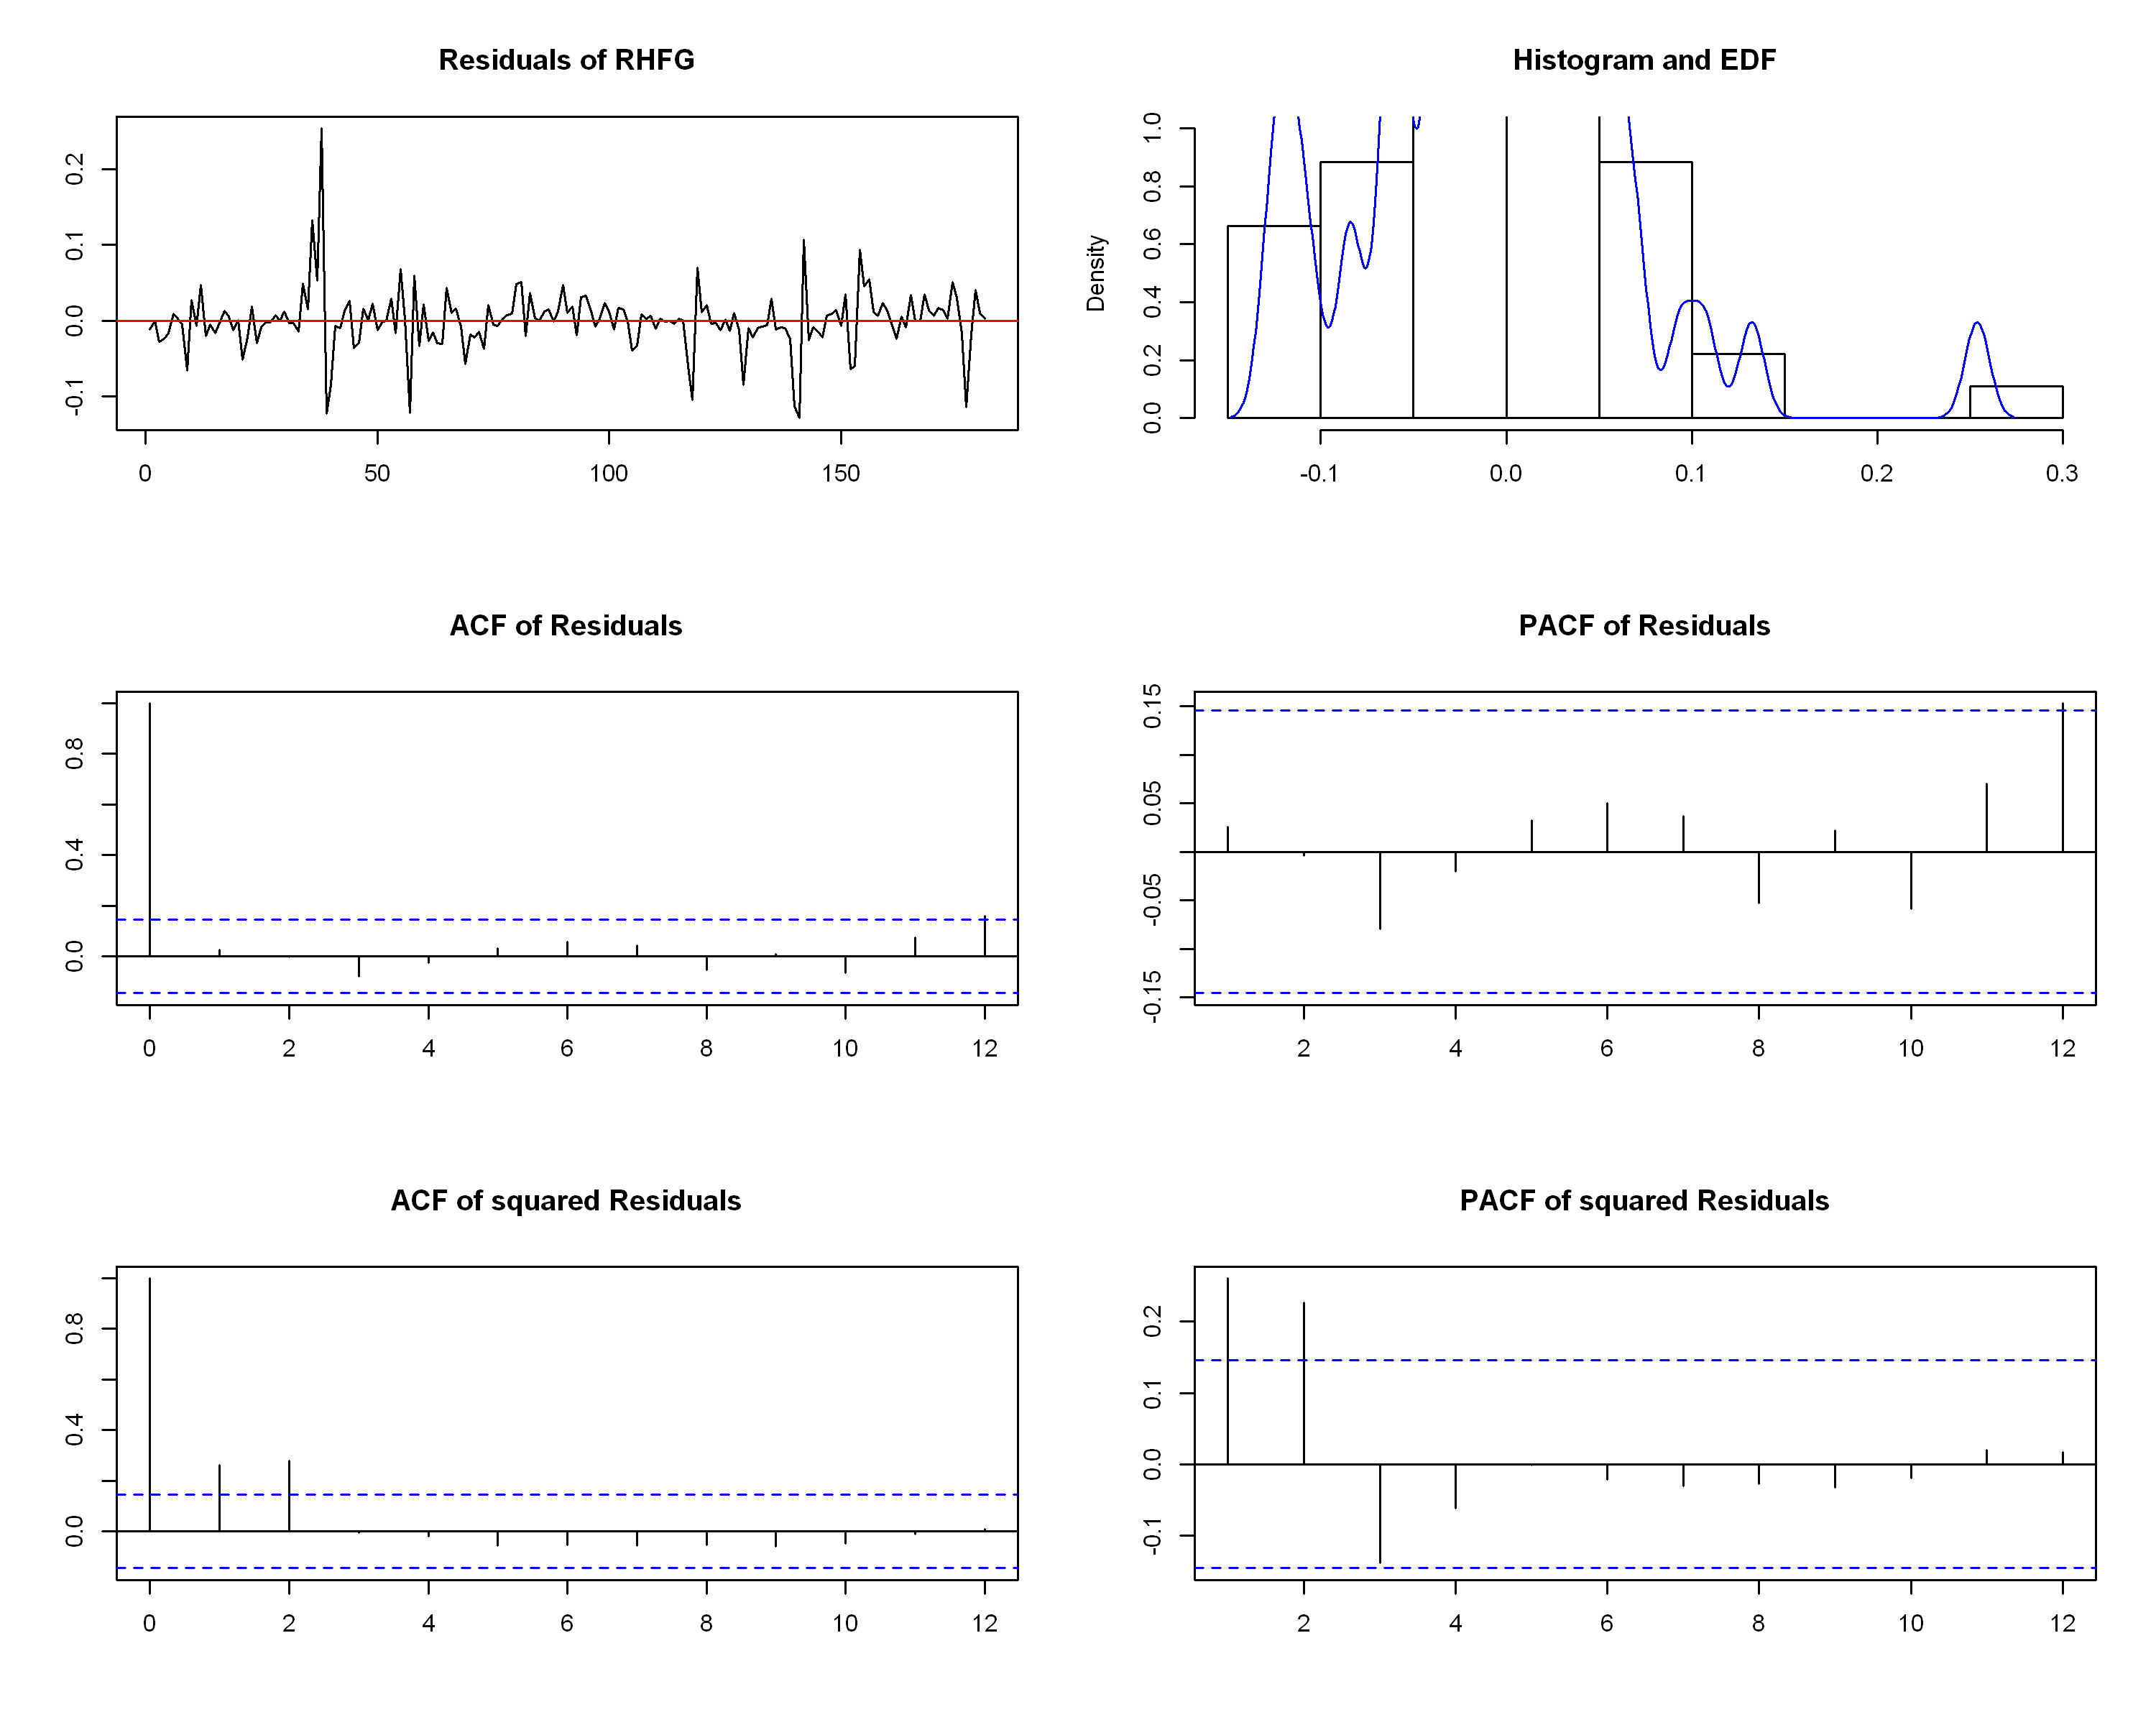

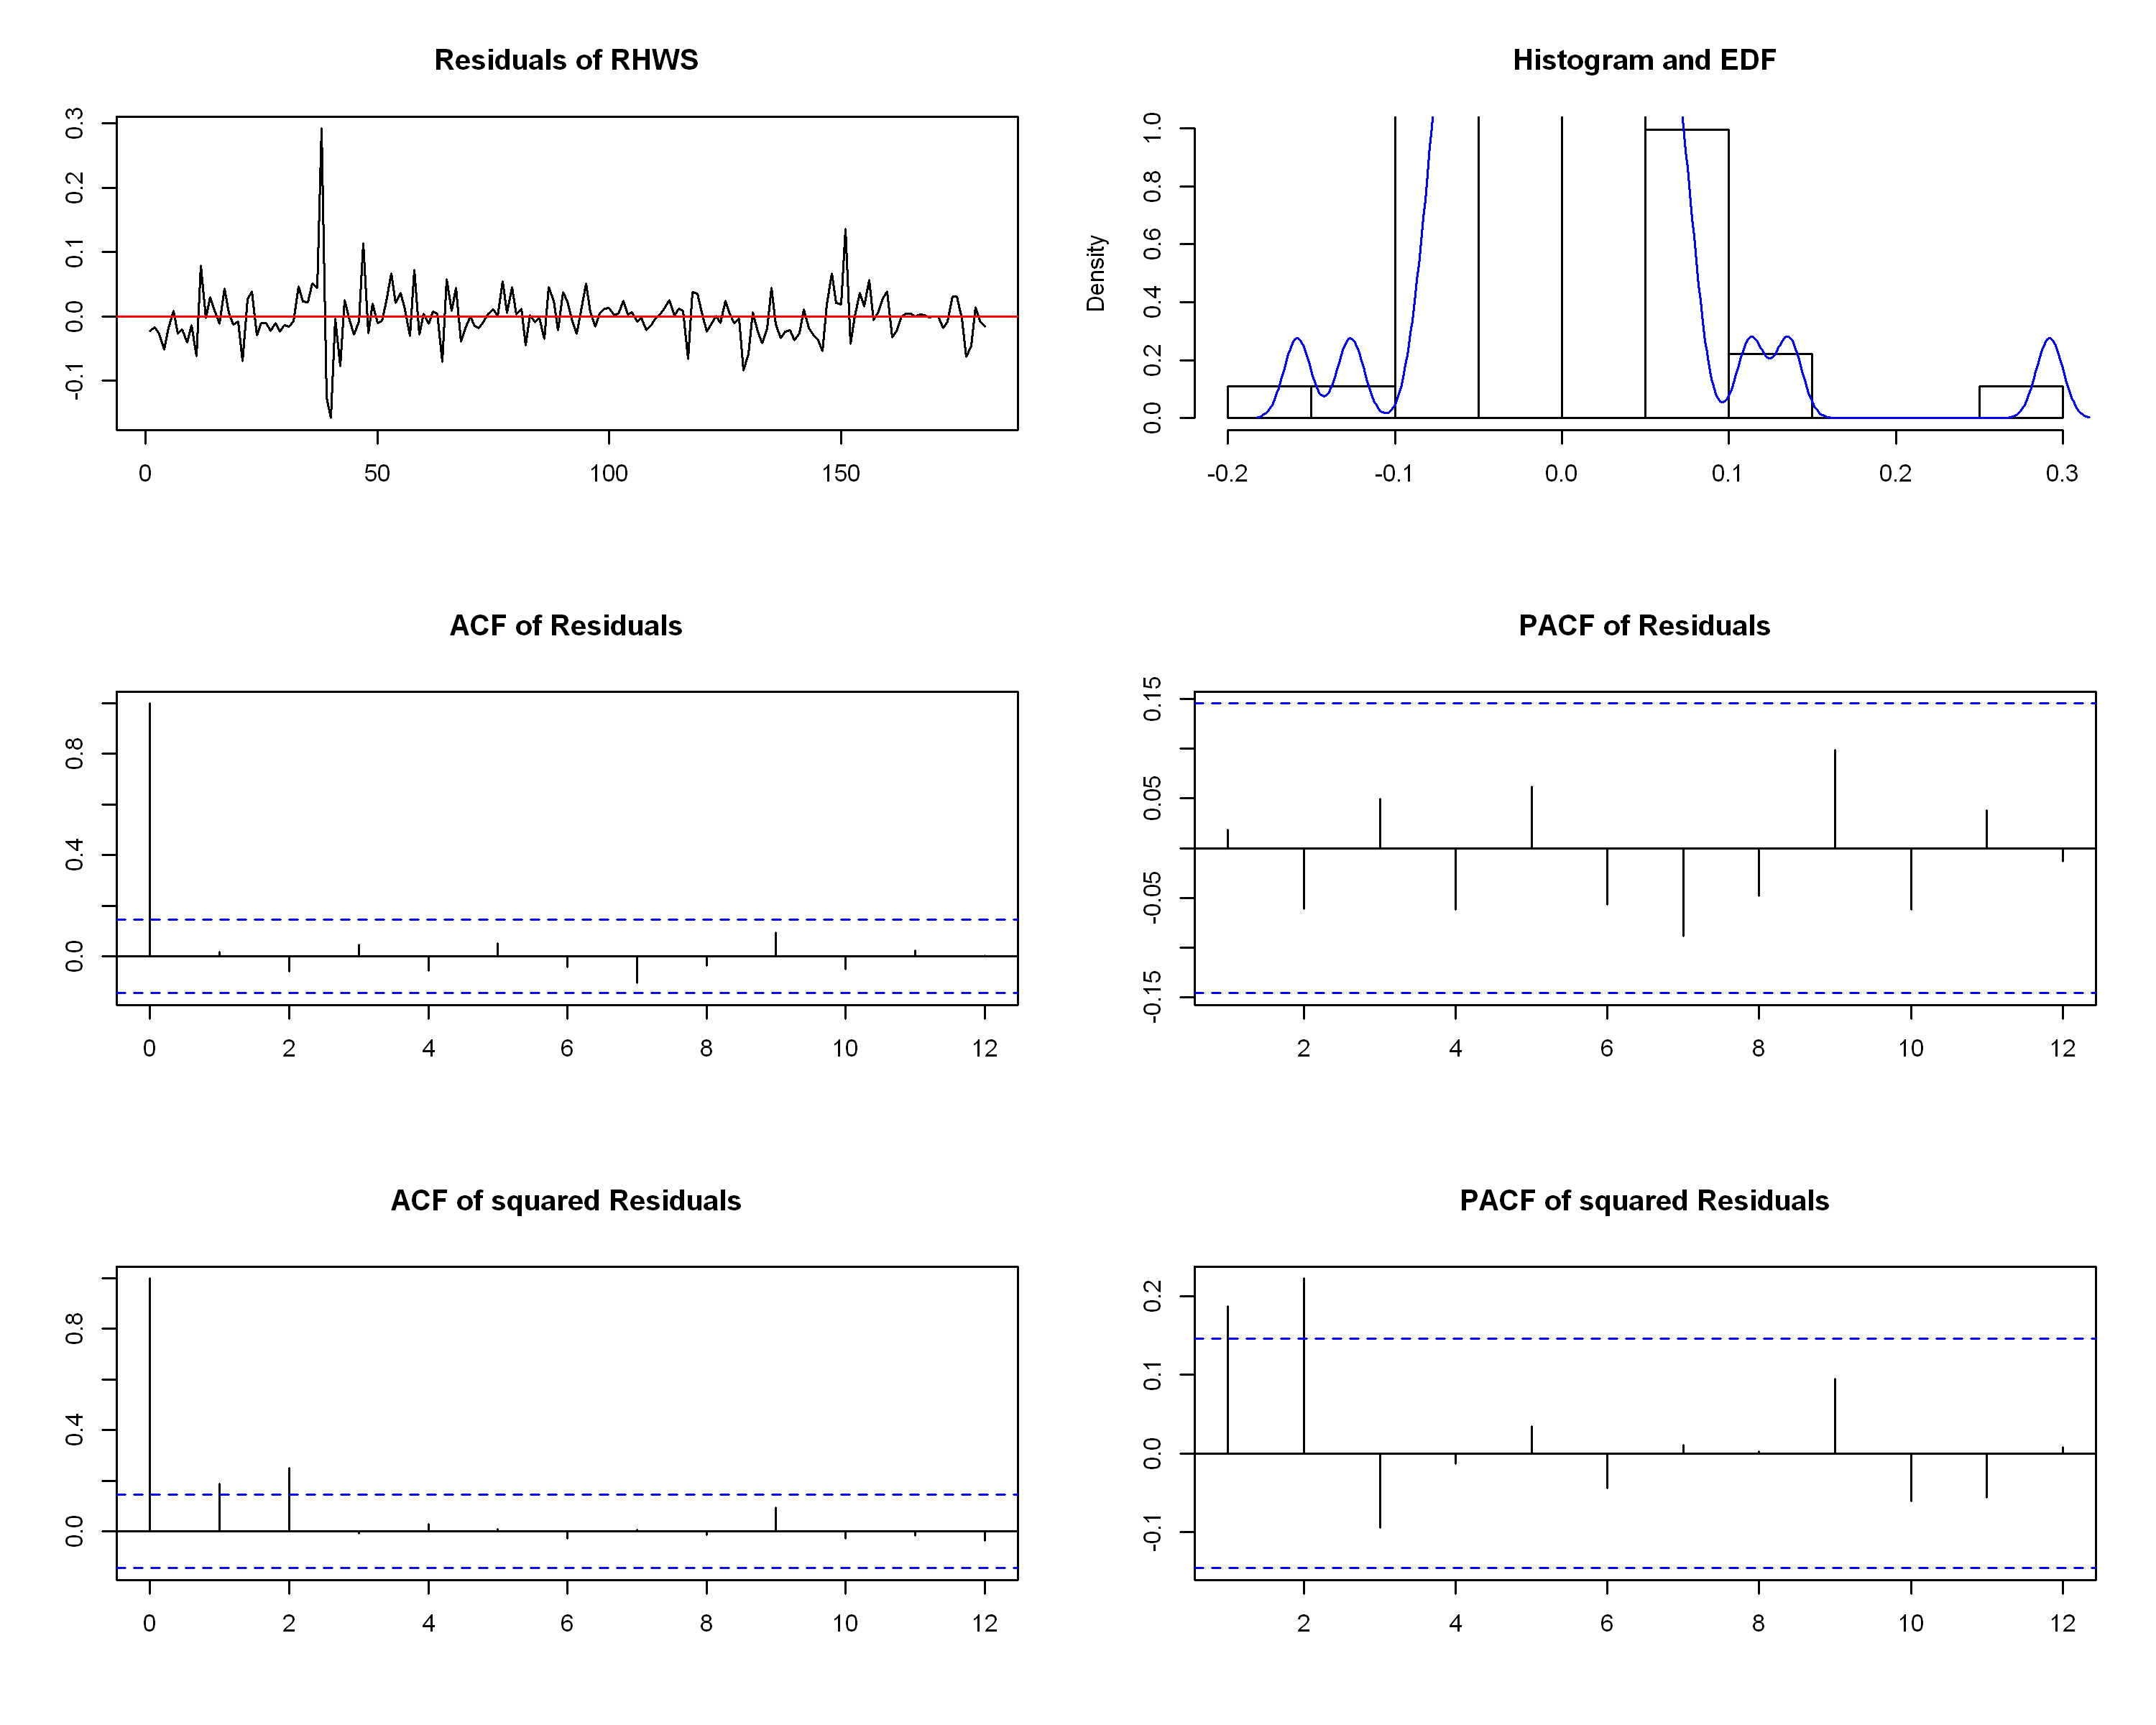

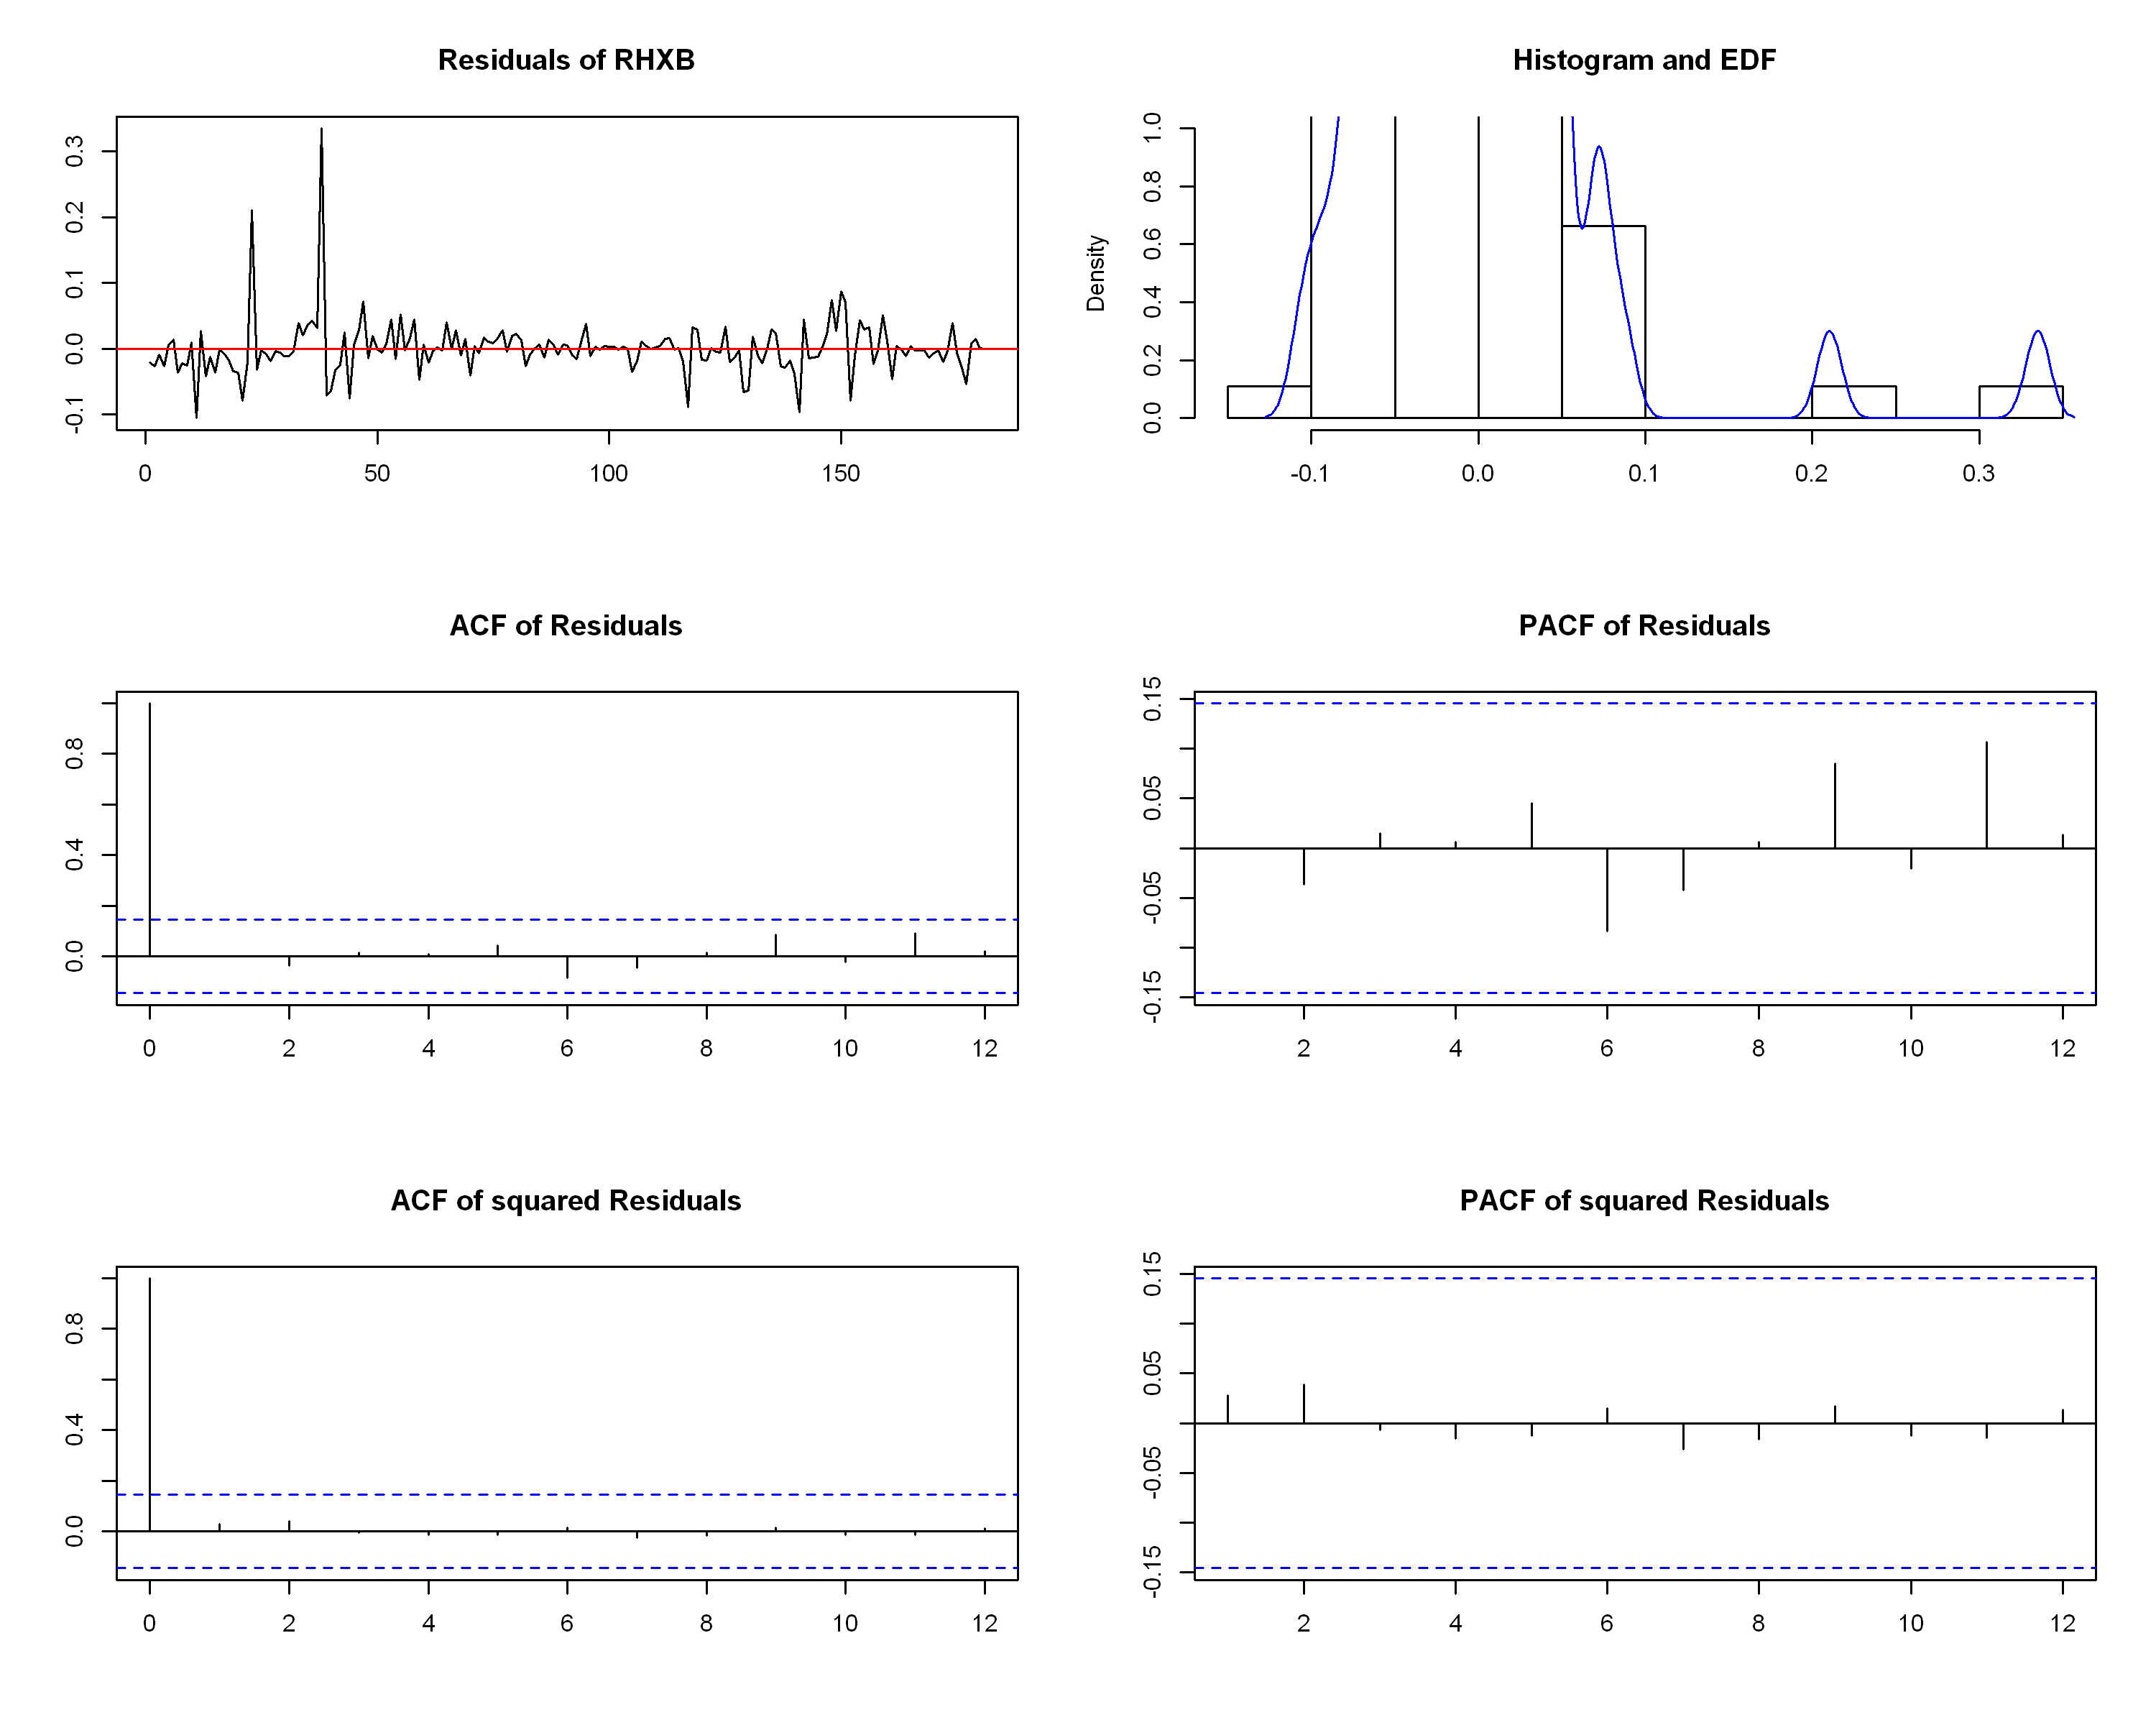

In [88]:
set_figsize(10, 8)
rh05.VAR.ser = serial.test(rh05.VAR)
plot(rh05.VAR.ser, names = "RHFG")
plot(rh05.VAR.ser, names = "RHWS")
plot(rh05.VAR.ser, names = "RHXB")

### Hetero

In [175]:
sp_vector <- c(1973.1,1961.53,1993.23,1937.27,2044.57,2054.27,2028.18,2082.2,2079.99,2094.86,2111.94,
               2099.29,2094.14,2039.87,1944.41,2024.81,2080.62,2054.08,1918.6,1904.42,2021.95,
               2075.54,2065.55,2083.89,2148.9,2170.95,2157.69,2143.02,2164.99,2246.63,2275.12,
               2329.91,2366.82,2359.31,2395.35,2433.99)
sp_ts <- ts(sp_vector,start=c(2014,7),frequency=12)

In [187]:
dum = ts(rep(1, 13), start=c(2008, 10),frequency = 12)

In [192]:
c(as.xts(rh05), as.xts(dum))

ERROR: Error in c.xts(as.xts(rh05), as.xts(dum)): data must have same number of columns to bind by row


In [196]:
data = replace_na(ts.union(rh05, dum), 0)

In [211]:
# data

In [209]:
VAR(data, p = 3, type = "both", exogen = dum)

ERROR: Error in VAR(data, p = 3, type = "both", exogen = dum): 
Different row size of y and exogen.



In [158]:
rh05.VAR = VAR(rh05, p = 4, type = "both", season = 12)

In [159]:
rh05.VAR.arch = arch.test(rh05.VAR, lags.multi = 12)
rh05.VAR.arch


	ARCH (multivariate)

data:  Residuals of VAR object rh05.VAR
Chi-squared = 481.01, df = 432, p-value = 0.05149

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object rh05.VAR
Chi-squared = 481.01, df = 432, p-value = 0.05149



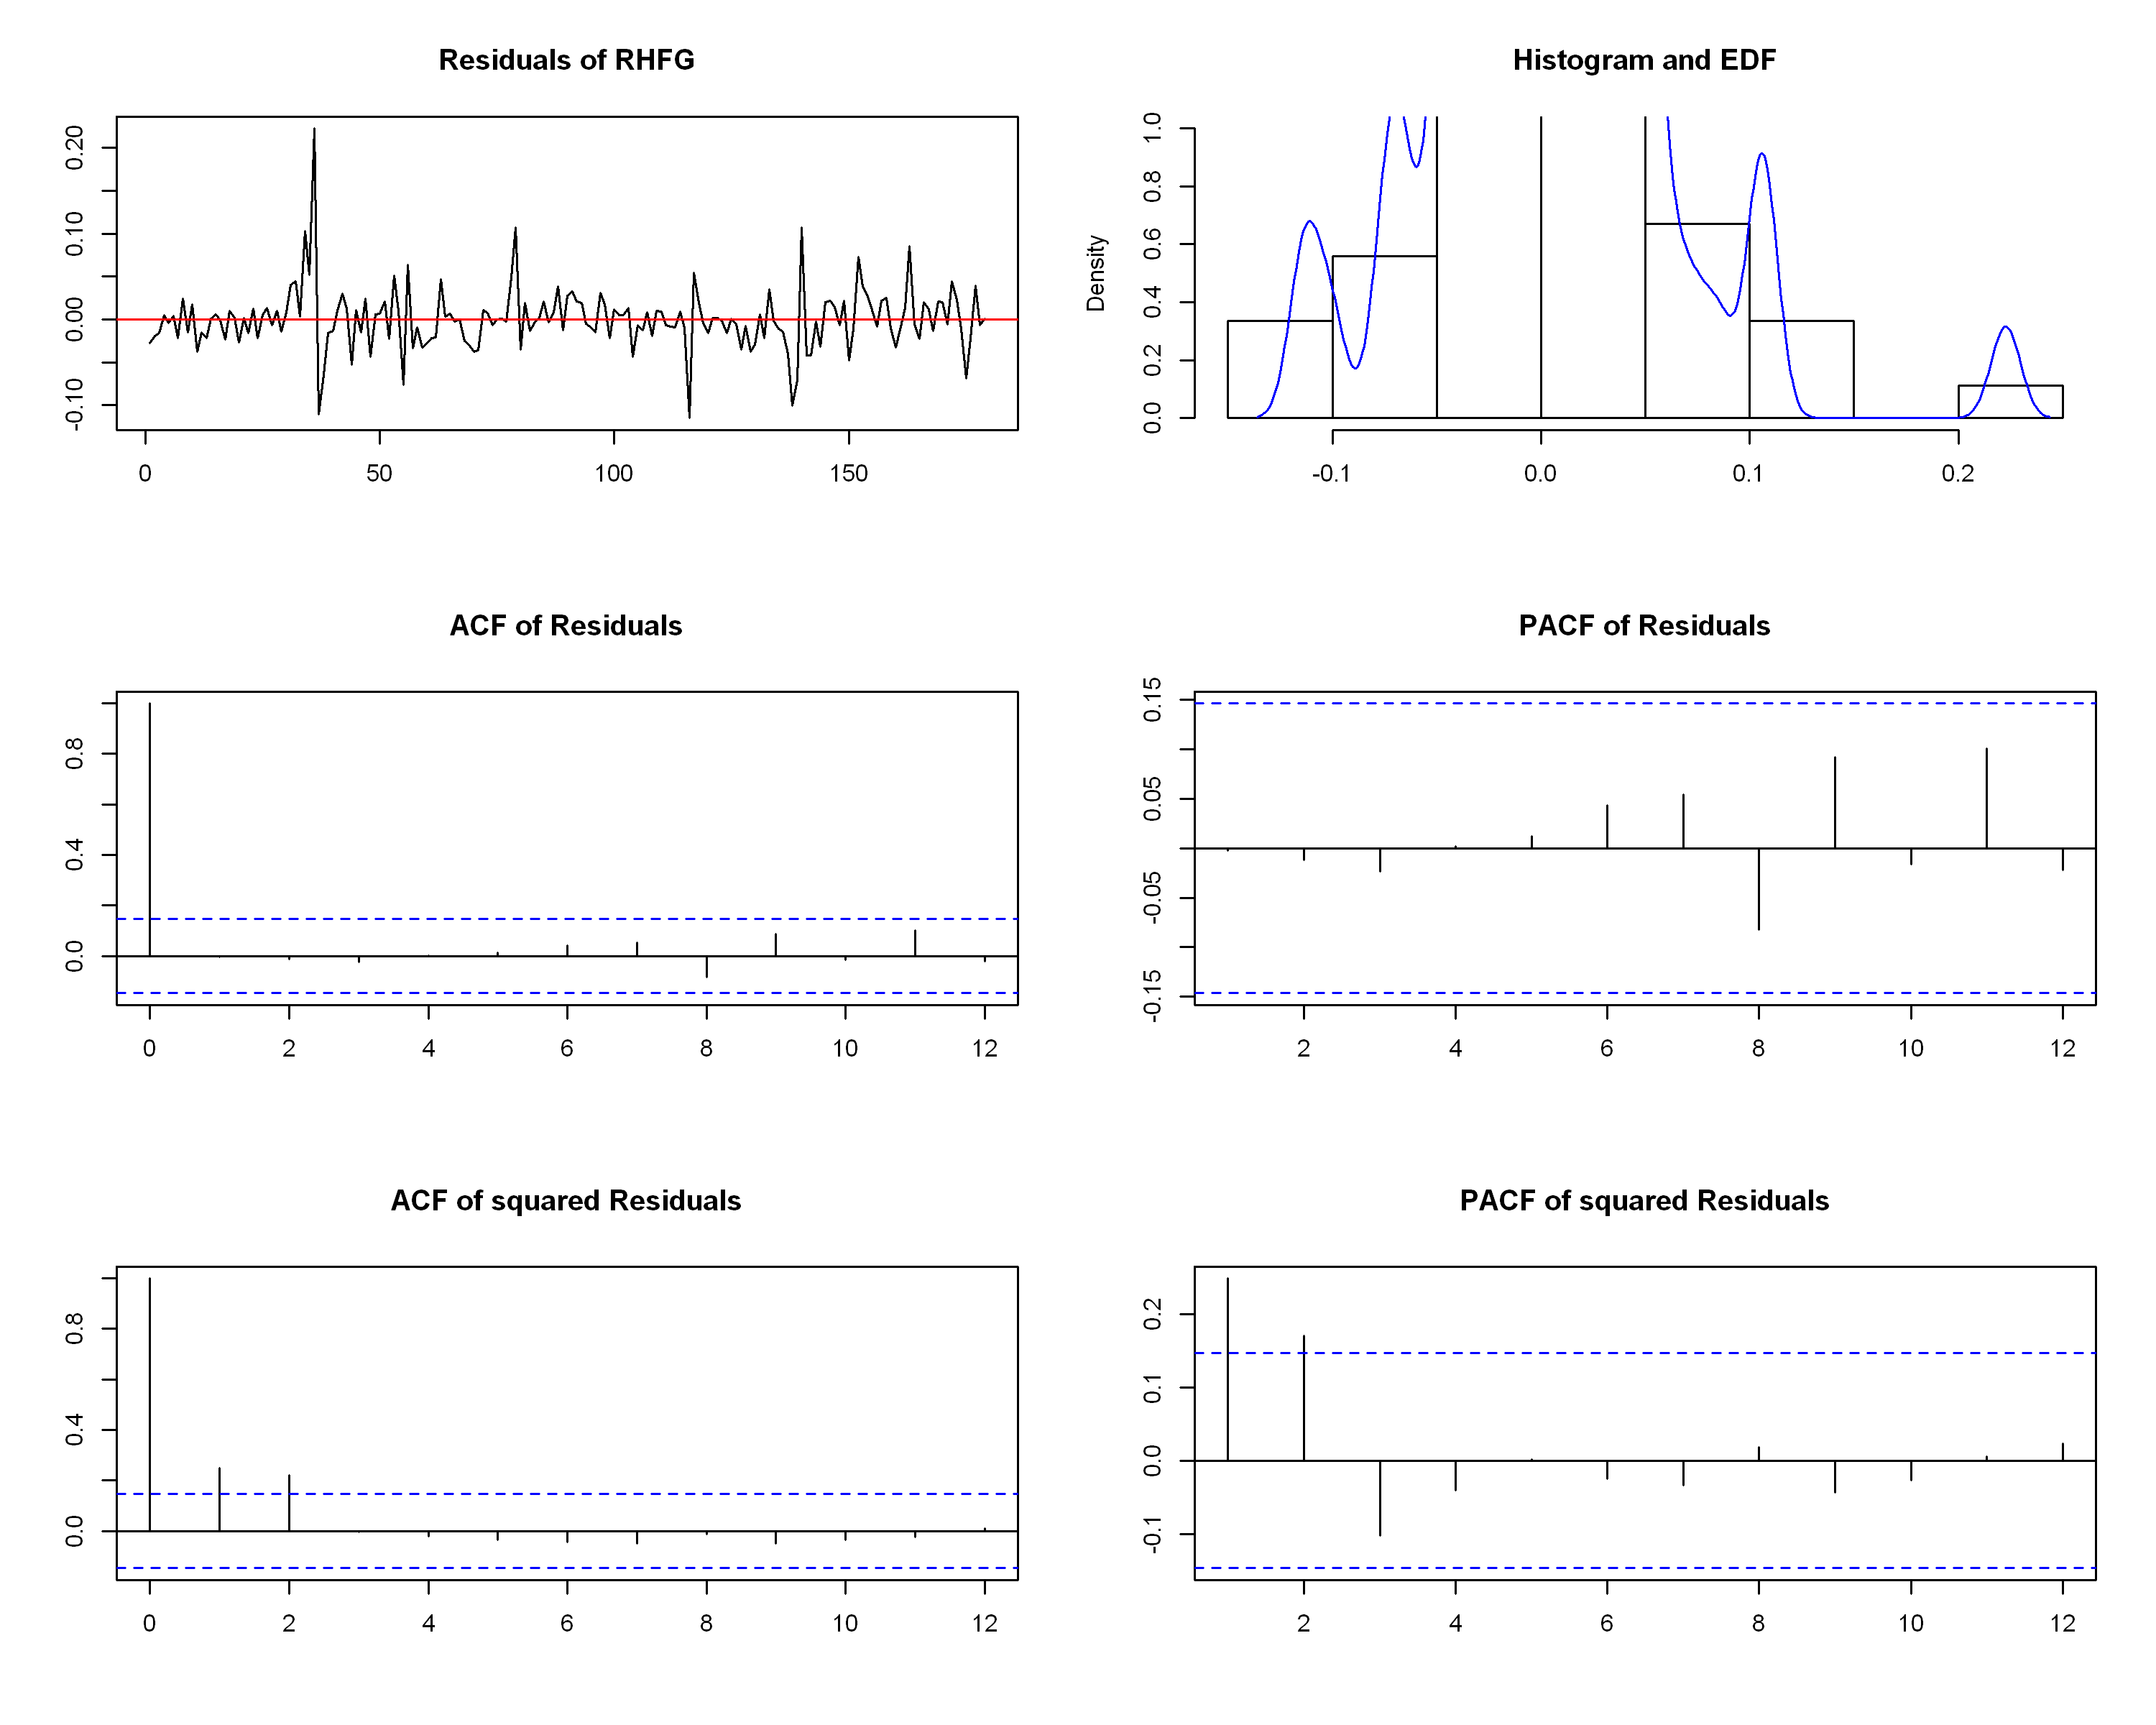

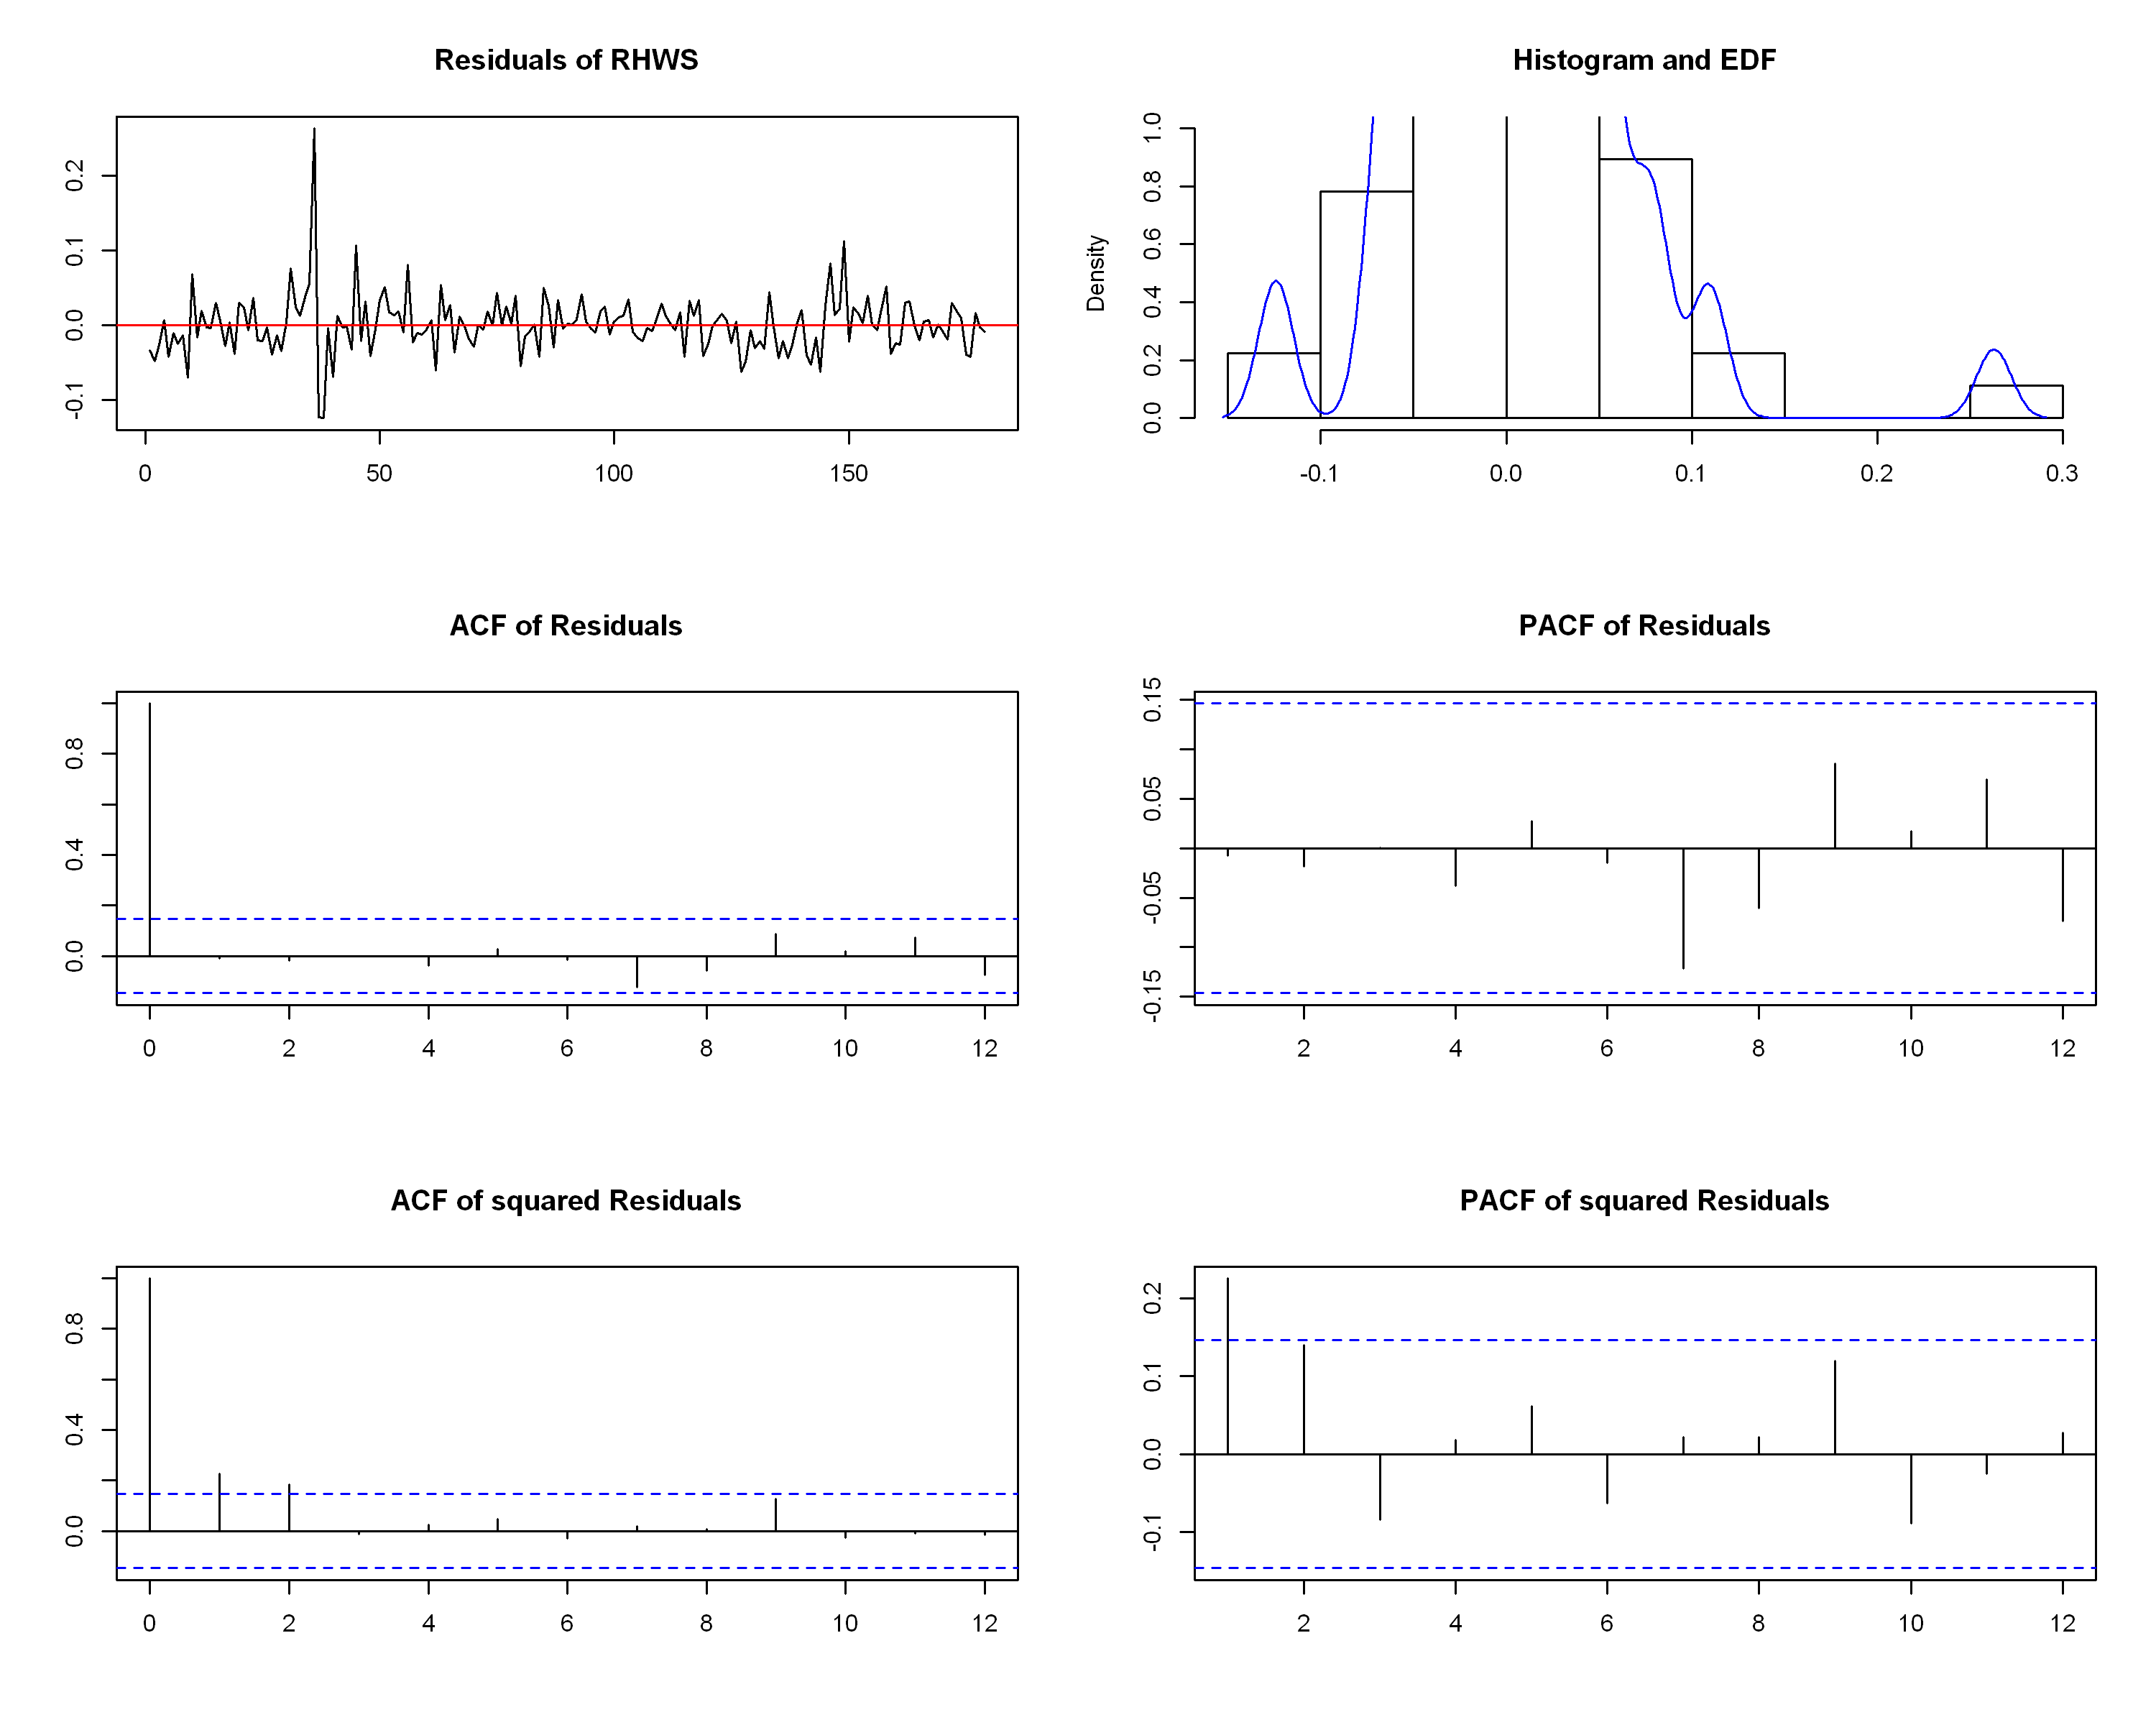

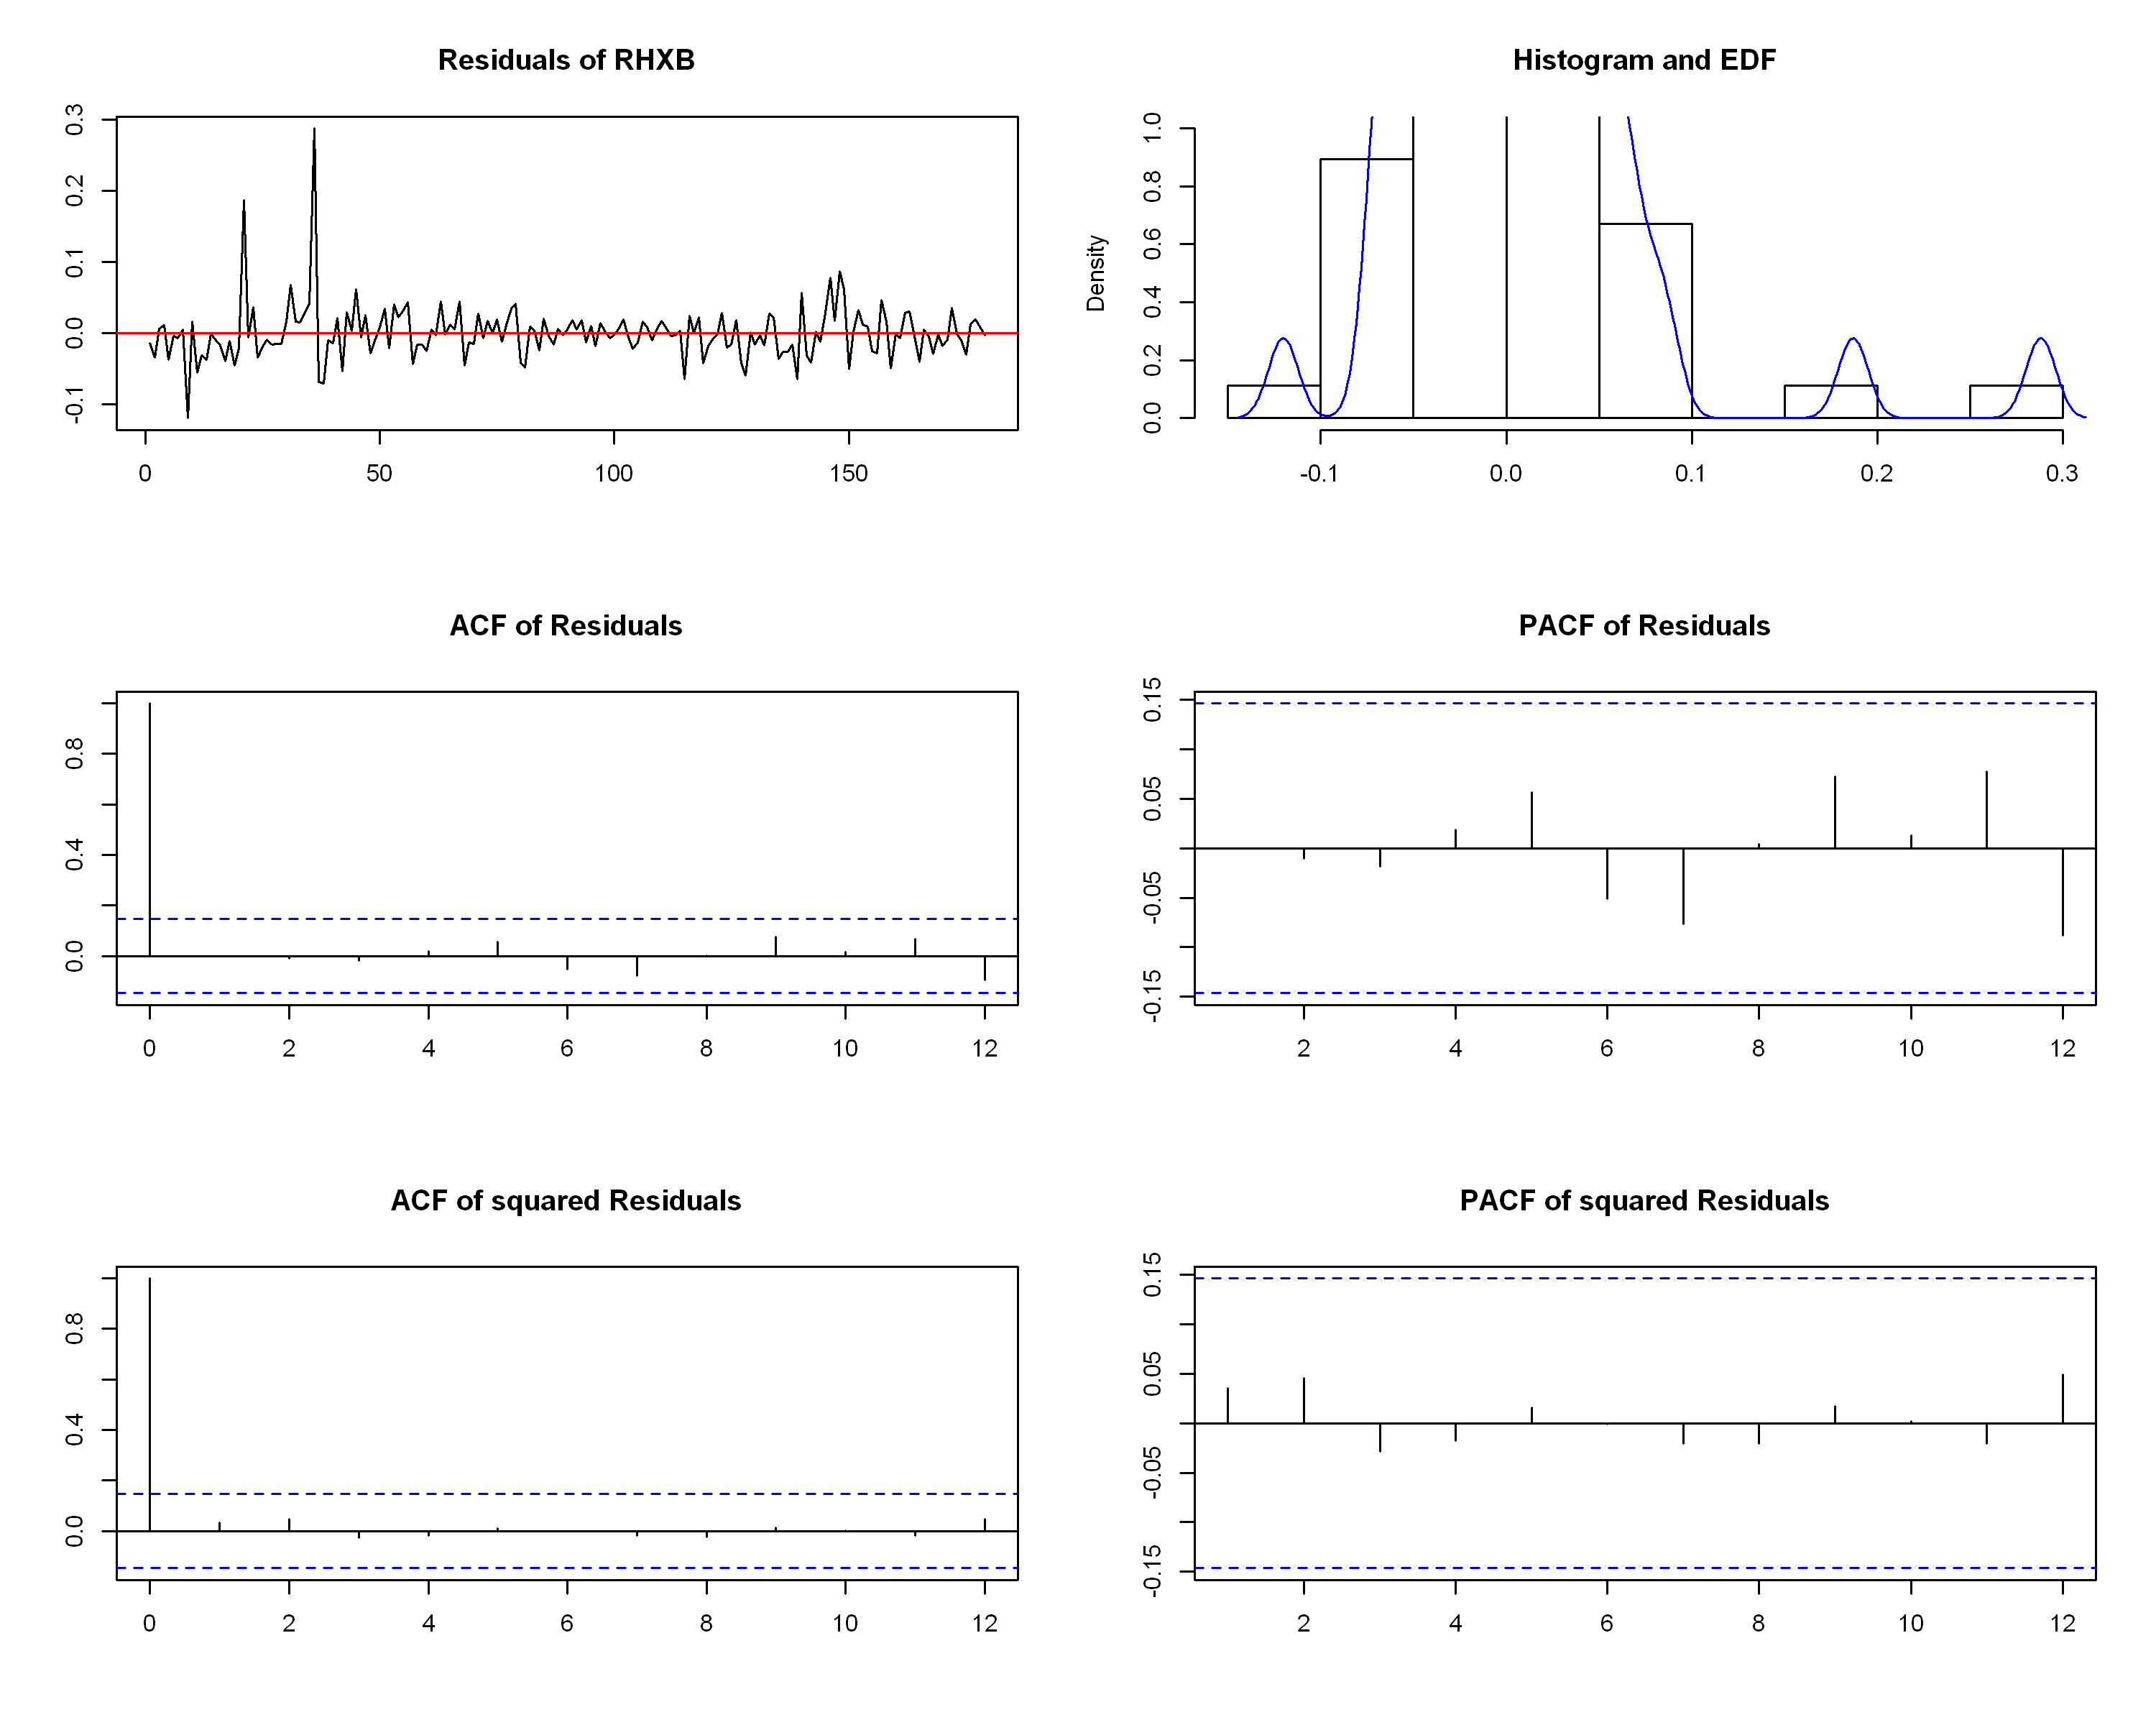

In [162]:
rh05.VAR %>% normality.test %>% plot

## Normality

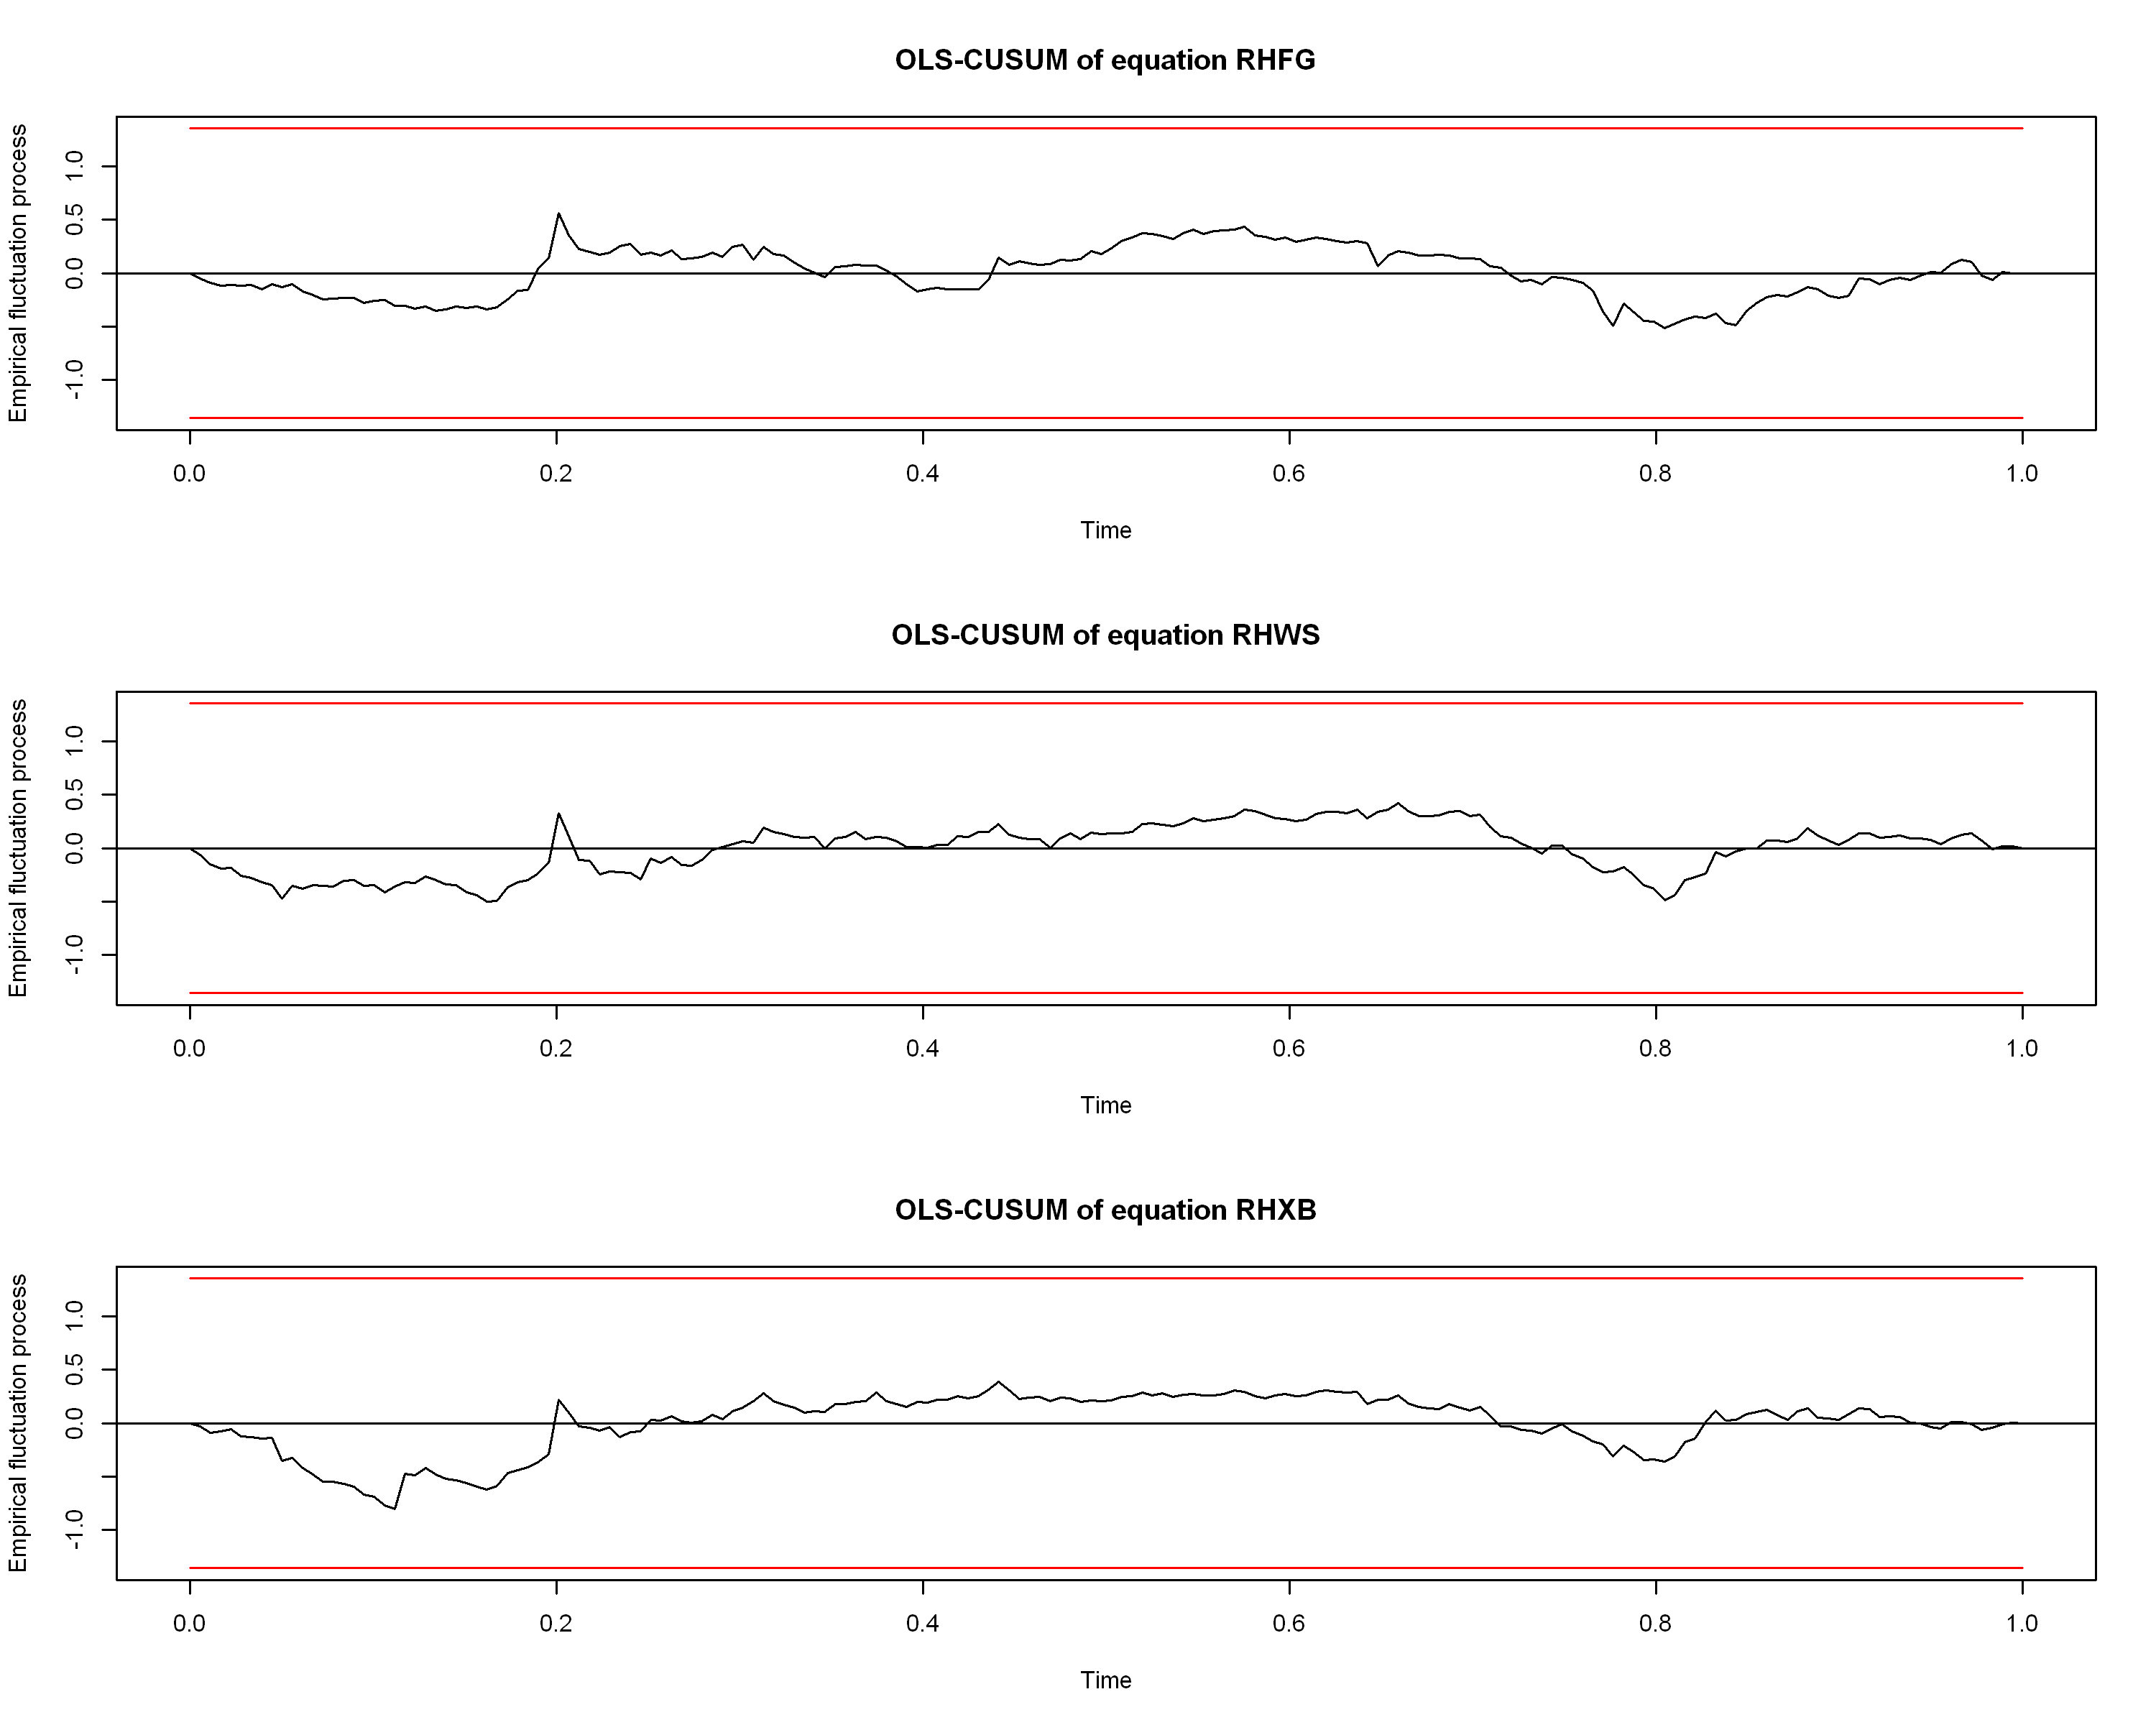

In [160]:
rh05.VAR %>% stability %>% plot

# Cointegration Analysis

In [13]:
args(ca.jo)

function (x, type = c("eigen", "trace"), ecdet = c("none", "const", 
    "trend"), K = 2, spec = c("longrun", "transitory"), season = NULL, 
    dumvar = NULL) 
NULL

In [43]:
vars::VARselect(rh05)
vars::VARselect(rh06)

,1,2,3,4,5,6,7,8,9,10
AIC(n),-2.027227e+01,-2.037441e+01,-2.032728e+01,-2.026394e+01,-2.020167e+01,-2.013251e+01,-2.008222e+01,-2.003518e+01,-1.996610e+01,-1.992311e+01
HQ(n),-2.018353e+01,-2.021912e+01,-2.010544e+01,-1.997555e+01,-1.984673e+01,-1.971101e+01,-1.959418e+01,-1.948058e+01,-1.934496e+01,-1.923541e+01
SC(n),-2.005354e+01,-1.999164e+01,-1.978047e+01,-1.955308e+01,-1.932677e+01,-1.909356e+01,-1.887923e+01,-1.866815e+01,-1.843503e+01,-1.822799e+01
FPE(n),1.569921e-09,1.417633e-09,1.486423e-09,1.584352e-09,1.687397e-09,1.810180e-09,1.906362e-09,2.002103e-09,2.150664e-09,2.252162e-09


,1,2,3,4,5,6,7,8,9,10
AIC(n),-2.031941e+01,-2.043073e+01,-2.038599e+01,-2.030920e+01,-2.024397e+01,-2.015745e+01,-2.011160e+01,-2.004793e+01,-1.997746e+01,-1.993813e+01
HQ(n),-2.022616e+01,-2.026754e+01,-2.015285e+01,-2.000612e+01,-1.987095e+01,-1.971449e+01,-1.959869e+01,-1.946509e+01,-1.932467e+01,-1.921540e+01
SC(n),-2.008974e+01,-2.002881e+01,-1.981181e+01,-1.956277e+01,-1.932529e+01,-1.906652e+01,-1.884841e+01,-1.861250e+01,-1.836977e+01,-1.815818e+01
FPE(n),1.497633e-09,1.340038e-09,1.401805e-09,1.514560e-09,1.618132e-09,1.766722e-09,1.853044e-09,1.979671e-09,2.130856e-09,2.224969e-09


In [122]:
rhrg  = price[, c('RHFG', 'RGFG')] %>% log() %>% na.omit()

In [123]:
rh.eigen = ca.jo(rh, type = "eigen", K = 2, ecdet = "trend")
rh.trace = ca.jo(rh, type = "trace", K = 2, ecdet = "trend")
rw.eigen = ca.jo(rw, type = "eigen", K = 2, ecdet = "trend")
rw.trace = ca.jo(rw, type = "trace", K = 2, ecdet = "trend")
rg.eigen = ca.jo(rg, type = "eigen", K = 2, ecdet = "trend")
rg.trace = ca.jo(rg, type = "trace", K = 2, ecdet = "trend")

rhfg.eigen = ca.jo(rhfg, type = "eigen", K = 2, ecdet = "trend")
rhfg.trace = ca.jo(rhfg, type = "trace", K = 2, ecdet = "trend")
rwfg.eigen = ca.jo(rwfg, type = "eigen", K = 2, ecdet = "trend")
rwfg.trace = ca.jo(rwfg, type = "trace", K = 2, ecdet = "trend")
rgfg.eigen = ca.jo(rgfg, type = "eigen", K = 2, ecdet = "trend")
rgfg.trace = ca.jo(rgfg, type = "trace", K = 2, ecdet = "trend")

rfg.eigen  = ca.jo(rfg, type = "eigen", K = 2, ecdet = "trend")
rfg.trace  = ca.jo(rfg, type = "trace", K = 2, ecdet = "trend")

rhrg.eigen  = ca.jo(rhrg, type = "eigen", K = 2, ecdet = "trend")
rhrg.trace  = ca.jo(rhrg, type = "trace", K = 2, ecdet = "trend")

In [220]:
tail(rw)

,RWFG,RWWS,RWXB
Oct 2019,8.977273,9.363266,9.451832
Nov 2019,8.972210,9.353301,9.443005
Dec 2019,8.949625,9.373970,9.467580
Jan 2020,8.956222,9.430571,9.517302
Feb 2020,9.007734,9.459665,9.561999
Mar 2020,9.021624,9.541303,9.668784


In [223]:
rw.xts = as.xts(rw)

In [222]:
x = ts(NA, start = c(2003, 1), end = c(2020, 3), frequency = 12)

In [ ]:
dum = ts(rep(1, 13), start=c(2008, 10), frequency = 12)

In [224]:
rw.eigen = ca.jo(rw.xts, type = "eigen", K = 2, 
                 ecdet = "trend", season = 12)

In [126]:
summary(rw.eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.720717e-01 1.205676e-01 2.882167e-02 5.146610e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  6.00 10.49 12.25 16.26
r <= 1 | 26.34 16.85 18.96 23.65
r = 0  | 38.71 23.11 25.54 30.34

Eigenvectors, normalised to first column:
(These are the cointegration relations)

              RWFG.l2       RWWS.l2      RWXB.l2      trend.l2
RWFG.l2   1.000000000  1.0000000000  1.000000000  1.0000000000
RWWS.l2  -1.673682458  1.3563503160 -4.197750781 -0.0003651884
RWXB.l2   0.635635523 -1.8989376896  4.625149495 -0.6110600006
trend.l2 -0.001082199  0.0002265453 -0.003706105 -0.0054614327

Weights W:
(This is the loading matrix)

           RWFG.l2     RWWS.l2     RWXB.l2      trend.l2
RWFG.d -0.06429698 -0.16560434 -0.01115718 -2.578404e-14
RWWS.d  0.2361

In [51]:
summary(rh.trace)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.075030e-01 7.284311e-02 2.178789e-02 3.469447e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.52 10.49 12.25 16.26
r <= 1 | 20.02 22.76 25.32 30.45
r = 0  | 43.34 39.06 42.44 48.45

Eigenvectors, normalised to first column:
(These are the cointegration relations)

              RHFG.l2       RHWS.l2     RHXB.l2     trend.l2
RHFG.l2   1.000000000  1.0000000000  1.00000000  1.000000000
RHWS.l2  -2.650458057 -0.0769546132  3.01000655 -0.134186727
RHXB.l2   1.456328509 -0.8727306821  5.58789753 -0.426166425
trend.l2  0.001355012  0.0006003921 -0.02694506 -0.007490006

Weights W:
(This is the loading matrix)

           RHFG.l2     RHWS.l2      RHXB.l2      trend.l2
RHFG.d -0.02510259 -0.08408703 -0.002464921  1.835989e-14
RHWS.d  0.02218719  0.01142821 -0.003171473 -1.0

In [60]:
cbind(rh.trace@teststat, rh.trace@cval)

,,10pct,5pct,1pct
r <= 2 |,4.515893,10.49,12.25,16.26
r <= 1 |,20.020552,22.76,25.32,30.45
r = 0 |,43.335646,39.06,42.44,48.45


In [61]:
rh.trace@V

,RHFG.l2,RHWS.l2,RHXB.l2,trend.l2
RHFG.l2,1.000000000,1.0000000000,1.00000000,1.000000000
RHWS.l2,-2.650458057,-0.0769546132,3.01000655,-0.134186727
RHXB.l2,1.456328509,-0.8727306821,5.58789753,-0.426166425
trend.l2,0.001355012,0.0006003921,-0.02694506,-0.007490006


In [63]:
A1 = matrix(c(1,0,0, 0,1,0), 
            nrow=3, ncol=2)
A2 = matrix(c(1,0,0, 0,0,1),
            nrow=3, ncol=2)

In [66]:
summary(alrtest(z = rh.trace, A = A1, r = 1))
summary(alrtest(z = rh.trace, A = A2, r = 1))


###################### 
# Johansen-Procedure # 
###################### 

Estimation and testing under linear restrictions on beta 

The VECM has been estimated subject to: 
beta=H*phi and/or alpha=A*psi

     [,1] [,2]
[1,]    1    0
[2,]    0    1
[3,]    0    0

Eigenvalues of restricted VAR (lambda):
[1] 0.0894 0.0631 0.0000 0.0000

The value of the likelihood ratio test statistic:
4.12 distributed as chi square with 1 df.
The p-value of the test statistic is: 0.04 

Eigenvectors, normalised to first column
of the restricted VAR:

               [,1]
RK.RHFG.l2   1.0000
RK.RHWS.l2  -1.5419
RK.RHXB.l2   0.3966
RK.trend.l2  0.0012

Weights W of the restricted VAR:

        [,1]
[1,] -0.0336
[2,]  0.0875
[3,]  0.0000



###################### 
# Johansen-Procedure # 
###################### 

Estimation and testing under linear restrictions on beta 

The VECM has been estimated subject to: 
beta=H*phi and/or alpha=A*psi

     [,1] [,2]
[1,]    1    0
[2,]    0    0
[3,]    0    1

Eigenvalues of restricted VAR (lambda):
[1] 0.1047 0.0725 0.0000 0.0000

The value of the likelihood ratio test statistic:
0.64 distributed as chi square with 1 df.
The p-value of the test statistic is: 0.42 

Eigenvectors, normalised to first column
of the restricted VAR:

               [,1]
RK.RHFG.l2   1.0000
RK.RHWS.l2  -2.7430
RK.RHXB.l2   1.5865
RK.trend.l2  0.0012

Weights W of the restricted VAR:

        [,1]
[1,] -0.0368
[2,]  0.0000
[3,] -0.0745


In [135]:
rw.trace


##################################################### 
# Johansen-Procedure Unit Root / Cointegration Test # 
##################################################### 

The value of the test statistic is: 5.9953 32.3334 71.0433 
